<a href="https://colab.research.google.com/github/pri538/Deep-Learning-Project/blob/main/GDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install country-converter
!pip install pmdarima
!pip install mljar-supervised
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.8/126.8 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 48.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 40.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.9/379.9 kB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 68.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 10.1 M

In [ ]:
import numpy as np
import pandas as pd

# importing libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
import plotly.graph_objs as go
import country_converter as coco

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.decomposition import PCA

from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 8, 6
from statsmodels.graphics.tsaplots import plot_predict

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from supervised.automl import AutoML
from pycaret.regression import *

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
df =pd.read_csv('/content/countries of the world.csv', sep=',', encoding = 'utf-8')
time= pd.read_csv('/content/GDP.csv', sep=',', encoding = 'utf-8')

In [ ]:
df

Country                               Region  Population  \
0       Afghanistan         ASIA (EX. NEAR EAST)             31056997   
1           Albania   EASTERN EUROPE                          3581655   
2           Algeria   NORTHERN AFRICA                        32930091   
3    American Samoa   OCEANIA                                   57794   
4           Andorra   WESTERN EUROPE                            71201   
..               ...                                  ...         ...   
222       West Bank   NEAR EAST                               2460492   
223  Western Sahara   NORTHERN AFRICA                          273008   
224           Yemen   NEAR EAST                              21456188   
225          Zambia   SUB-SAHARAN AFRICA                     11502010   
226        Zimbabwe   SUB-SAHARAN AFRICA                     12236805   

     Area (sq. mi.) Pop. Density (per sq. mi.) Coastline (coast/area ratio)  \
0            647500                       48,0                         0,00   
1             28748                      124,6                         1,26   
2           2381740                       13,8                         0,04   
3               199                      290,4                        58,29   
4               468                      152,1                         0,00   
..              ...                        ...                          ...   
222            5860                      419,9                         0,00   
223          266000                        1,0                         0,42   
224          527970                       40,6                         0,36   
225          752614                       15,3                         0,00   
226          390580                       31,3                         0,00   

    Net migration Infant mortality (per 1000 births)  GDP ($ per capita)  \
0           23,06                             163,07               700.0   
1           -4,93                              21,52              4500.0   
2           -0,39                                 31              6000.0   
3          -20,71                               9,27              8000.0   
4             6,6                               4,05             19000.0   
..            ...                                ...                 ...   
222          2,98                              19,62               800.0   
223           NaN                                NaN                 NaN   
224             0                               61,5               800.0   
225             0                              88,29               800.0   
226             0                              67,69              1900.0   

    Literacy (%) Phones (per 1000) Arable (%) Crops (%) Other (%) Climate  \
0           36,0               3,2      12,13      0,22     87,65       1   
1           86,5              71,2      21,09      4,42     74,49       3   
2           70,0              78,1       3,22      0,25     96,53       1   
3           97,0             259,5         10        15        75       2   
4          100,0             497,2       2,22         0     97,78       3   
..           ...               ...        ...       ...       ...     ...   
222          NaN             145,2       16,9     18,97     64,13       3   
223          NaN               NaN       0,02         0     99,98       1   
224         50,2              37,2       2,78      0,24     96,98       1   
225         80,6               8,2       7,08      0,03      92,9       2   
226         90,7              26,8       8,32      0,34     91,34       2   

    Birthrate Deathrate Agriculture Industry Service  
0        46,6     20,34        0,38     0,24    0,38  
1       15,11      5,22       0,232    0,188   0,579  
2       17,14      4,61       0,101      0,6   0,298  
3       22,46      3,27         NaN      NaN     NaN  
4        8,71      6,25         NaN      NaN     NaN  
..        ...      

In [ ]:
df.columns.to_list()

['Country',
 'Region',
 'Population',
 'Area (sq. mi.)',
 'Pop. Density (per sq. mi.)',
 'Coastline (coast/area ratio)',
 'Net migration',
 'Infant mortality (per 1000 births)',
 'GDP ($ per capita)',
 'Literacy (%)',
 'Phones (per 1000)',
 'Arable (%)',
 'Crops (%)',
 'Other (%)',
 'Climate',
 'Birthrate',
 'Deathrate',
 'Agriculture',
 'Industry',
 'Service']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

In [ ]:
df[['Country', 'Region', 'Climate']].sample(25)

Country                               Region Climate
178  Sao Tome & Principe   SUB-SAHARAN AFRICA                        2
222            West Bank   NEAR EAST                                 3
134              Mayotte   SUB-SAHARAN AFRICA                        2
123            Macedonia   EASTERN EUROPE                            3
192                Sudan   SUB-SAHARAN AFRICA                        2
184            Singapore         ASIA (EX. NEAR EAST)                2
78             Gibraltar   WESTERN EUROPE                          NaN
146          Netherlands   WESTERN EUROPE                            3
12               Austria   WESTERN EUROPE                            3
51                  Cuba               LATIN AMER. & CARIB           2
166                Qatar   NEAR EAST                                 1
19               Belgium   WESTERN EUROPE                            3
203                Tonga   OCEANIA                                   2
6               Anguilla               LATIN AMER. & CARIB           2
142           Mozambique   SUB-SAHARAN AFRICA                        2
144                Nauru   OCEANIA                                   2
87         Guinea-Bissau   SUB-SAHARAN AFRICA                        2
181               Serbia   EASTERN EUROPE                          NaN
138               Monaco   WESTERN EUROPE                          NaN
41                 Chile               LATIN AMER. & CARIB           3
36                Canada   NORTHERN AMERICA                        NaN
116              Lesotho   SUB-SAHARAN AFRICA                        3
197                Syria   NEAR EAST                                 1
17              Barbados               LATIN AMER. & CARIB           2
83                  Guam   OCEANIA                                   2

In [ ]:
df[['Arable (%)','Crops (%)','Other (%)','Coastline (coast/area ratio)']]

Arable (%) Crops (%) Other (%) Coastline (coast/area ratio)
0        12,13      0,22     87,65                         0,00
1        21,09      4,42     74,49                         1,26
2         3,22      0,25     96,53                         0,04
3           10        15        75                        58,29
4         2,22         0     97,78                         0,00
..         ...       ...       ...                          ...
222       16,9     18,97     64,13                         0,00
223       0,02         0     99,98                         0,42
224       2,78      0,24     96,98                         0,36
225       7,08      0,03      92,9                         0,00
226       8,32      0,34     91,34                         0,00

[227 rows x 4 columns]

In [ ]:
df.describe()

Population  Area (sq. mi.)  GDP ($ per capita)
count  2.270000e+02    2.270000e+02          226.000000
mean   2.874028e+07    5.982270e+05         9689.823009
std    1.178913e+08    1.790282e+06        10049.138513
min    7.026000e+03    2.000000e+00          500.000000
25%    4.376240e+05    4.647500e+03         1900.000000
50%    4.786994e+06    8.660000e+04         5550.000000
75%    1.749777e+07    4.418110e+05        15700.000000
max    1.313974e+09    1.707520e+07        55100.000000

In [ ]:
df.describe(include = 'O')

Country                               Region  \
count            227                                  227   
unique           227                                   11   
top     Afghanistan   SUB-SAHARAN AFRICA                    
freq               1                                   51   

       Pop. Density (per sq. mi.) Coastline (coast/area ratio) Net migration  \
count                         227                          227           224   
unique                        219                          151           157   
top                          66,6                         0,00             0   
freq                            2                           44            62   

       Infant mortality (per 1000 births) Literacy (%) Phones (per 1000)  \
count                                 224          209               223   
unique                                220          140               214   
top                                  9,95         99,0             269,5   
freq                                    3           13                 2   

       Arable (%) Crops (%) Other (%) Climate Birthrate Deathrate Agriculture  \
count         225       225       225     205       224       223         212   
unique        203       162       209       6       220       201         150   
top             0         0       100       2     20,48      5,28        0,01   
freq            9        28         8     111         2         2           8   

       Industry Service  
count       211     212  
unique      155     167  
top        0,17   0,684  
freq          4       5

In [ ]:
df[df.duplicated()]

Empty DataFrame
Columns: [Country, Region, Population, Area (sq. mi.), Pop. Density (per sq. mi.), Coastline (coast/area ratio), Net migration, Infant mortality (per 1000 births), GDP ($ per capita), Literacy (%), Phones (per 1000), Arable (%), Crops (%), Other (%), Climate, Birthrate, Deathrate, Agriculture, Industry, Service]
Index: []

In [ ]:
climate_mapping = {1: 1, 1.5: 2, 2: 3, 2.5: 4, 3: 5, 4: 6}
df['Climate'] = df['Climate'].replace(climate_mapping)
df.Climate.value_counts().sort_index()

Climate
1       29
1,5      8
2      111
2,5      3
3       48
4        6
Name: count, dtype: int64

In [ ]:
cols =['Climate', 'Service', 'Industry', 'Agriculture', 'Deathrate', 'Birthrate',
       'Other (%)', 'Crops (%)', 'Arable (%)', 'Phones (per 1000)', 'Literacy (%)',
       'Infant mortality (per 1000 births)', 'Net migration', 'Coastline (coast/area ratio)',
       'Pop. Density (per sq. mi.)']
for col in cols:
    df[col] = df[col].str.replace(',', '.').astype(float)
df['Population'] =df['Population'] .astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [ ]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

<Axes: >

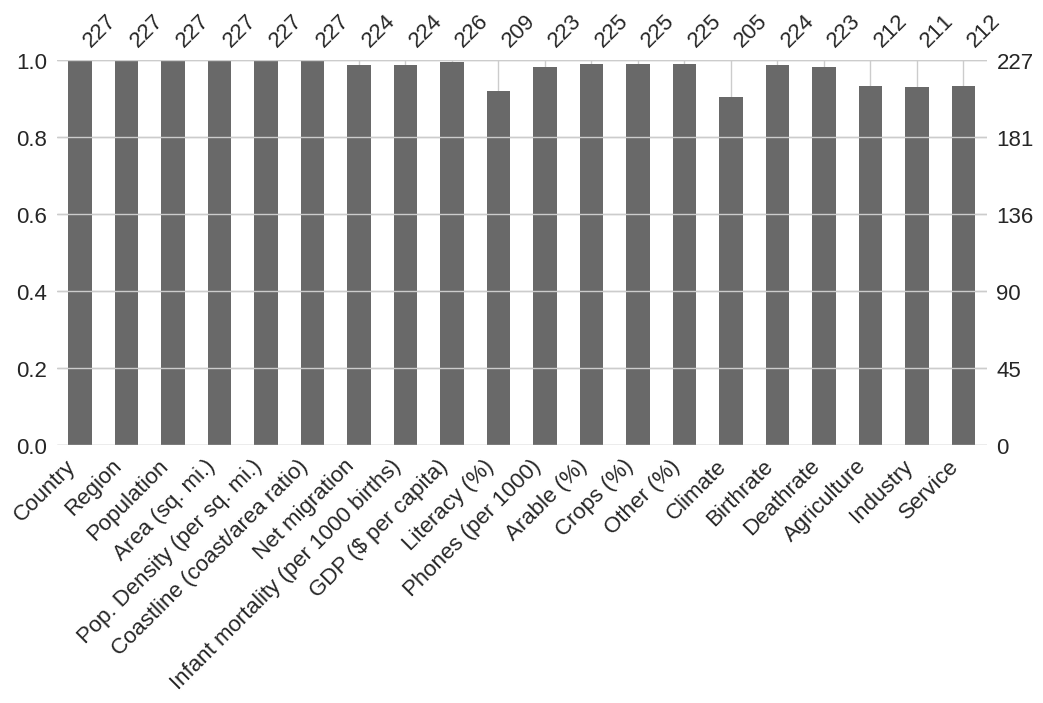

In [ ]:
msno.bar(df, figsize=(12,5))

In [ ]:
df[df['GDP ($ per capita)'].isnull()==True]

Country                               Region  Population  \
223  Western Sahara   NORTHERN AFRICA                          273008   

     Area (sq. mi.)  Pop. Density (per sq. mi.)  Coastline (coast/area ratio)  \
223          266000                         1.0                          0.42   

     Net migration  Infant mortality (per 1000 births)  GDP ($ per capita)  \
223            NaN                                 NaN                 NaN   

     Literacy (%)  Phones (per 1000)  Arable (%)  Crops (%)  Other (%)  \
223           NaN                NaN        0.02        0.0      99.98   

     Climate  Birthrate  Deathrate  Agriculture  Industry  Service  
223      1.0        NaN        NaN          NaN       NaN      0.4

In [ ]:
df['GDP ($ per capita)'] =df['GDP ($ per capita)'].fillna(2955)

In [ ]:
df[df['GDP ($ per capita)'].isnull()==True]

Empty DataFrame
Columns: [Country, Region, Population, Area (sq. mi.), Pop. Density (per sq. mi.), Coastline (coast/area ratio), Net migration, Infant mortality (per 1000 births), GDP ($ per capita), Literacy (%), Phones (per 1000), Arable (%), Crops (%), Other (%), Climate, Birthrate, Deathrate, Agriculture, Industry, Service]
Index: []

In [ ]:
region_mean_climate = df.groupby(['Region']).Climate.mean().round(0).to_dict()
df['Climate'].fillna(df['Region'].map(region_mean_climate), inplace=True)

In [ ]:
df[df['Literacy (%)'].isnull()==True]['Country']

25     Bosnia & Herzegovina 
66            Faroe Islands 
74               Gaza Strip 
78                Gibraltar 
80                Greenland 
85                 Guernsey 
99              Isle of Man 
104                  Jersey 
108                Kiribati 
123               Macedonia 
134                 Mayotte 
144                   Nauru 
185                Slovakia 
187         Solomon Islands 
209                  Tuvalu 
220          Virgin Islands 
222               West Bank 
223          Western Sahara 
Name: Country, dtype: object

In [ ]:
df.loc[25,'Literacy (%)' ] = 87.9
df.loc[66,'Literacy (%)'] = 99
df.loc[74,'Literacy (%)'] = 96.92
df.loc[78,'Literacy (%)'] = 80
df.loc[80,'Literacy (%)'] = 100
df.loc[85,'Literacy (%)'] = 100
df.loc[99,'Literacy (%)'] = np.nan # couldn't find any info
df.loc[104,'Literacy (%)'] = np.nan # couldn't find any info
df.loc[108,'Literacy (%)'] = 89.3
df.loc[123,'Literacy (%)'] = 98.4
df.loc[134,'Literacy (%)'] = 90
df.loc[144,'Literacy (%)'] = 96.5
df.loc[185,'Literacy (%)'] = 82.7
df.loc[187,'Literacy (%)'] = 76.6
df.loc[209,'Literacy (%)'] = 99
df.loc[220,'Literacy (%)'] = 97.8
df.loc[222,'Literacy (%)'] = 96.92
df.loc[223,'Literacy (%)'] = 50

In [ ]:
region_mean_Literacy = df.groupby(['Region'])['Literacy (%)'].mean().round(0).to_dict()
df['Literacy (%)'].fillna(df['Region'].map(region_mean_Literacy), inplace=True)

In [ ]:
df[df['Literacy (%)'].isnull()==True]

Empty DataFrame
Columns: [Country, Region, Population, Area (sq. mi.), Pop. Density (per sq. mi.), Coastline (coast/area ratio), Net migration, Infant mortality (per 1000 births), GDP ($ per capita), Literacy (%), Phones (per 1000), Arable (%), Crops (%), Other (%), Climate, Birthrate, Deathrate, Agriculture, Industry, Service]
Index: []

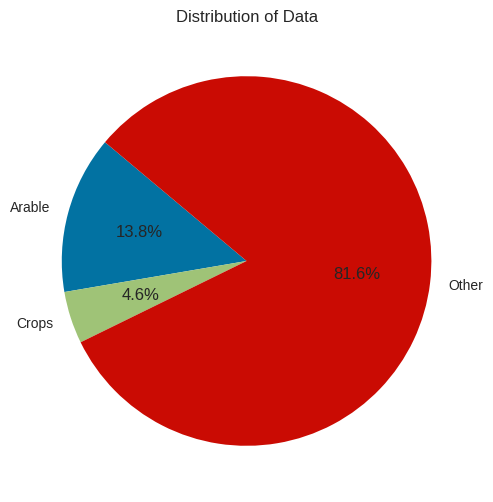

In [ ]:
#with missing
category_labels = ['Arable', 'Crops', 'Other']
category_values = [df['Arable (%)'].sum(), df['Crops (%)'].sum(), df['Other (%)'].sum()]

plt.figure(figsize=(6, 6))
plt.pie(category_values, labels=category_labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Data')

plt.axis()
plt.show()

In [ ]:
region_mean_Arable = df.groupby(['Region'])['Arable (%)'].mean().round(0).to_dict()
df['Arable (%)'].fillna(df['Region'].map(region_mean_Arable), inplace=True)

region_mean_Crops = df.groupby(['Region'])['Crops (%)'].mean().round(0).to_dict()
df['Crops (%)'].fillna(df['Region'].map(region_mean_Crops), inplace=True)

# since the arable, crops and others are complementry we can fill by subtracting them
other_fill =100-df['Crops (%)']- df['Arable (%)']
df['Other (%)'].fillna(other_fill, inplace=True)

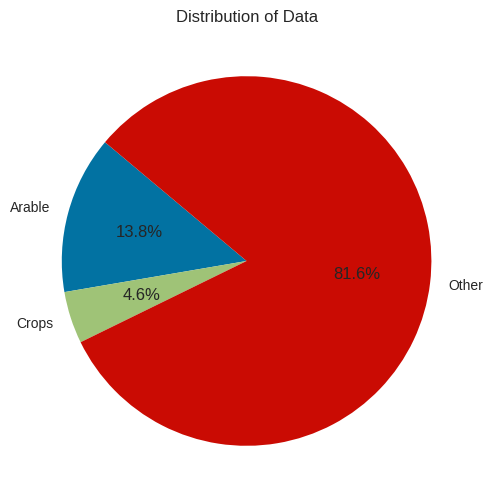

In [ ]:
category_labels = ['Arable', 'Crops', 'Other']
category_values = [df['Arable (%)'].sum(), df['Crops (%)'].sum(), df['Other (%)'].sum()]

plt.figure(figsize=(6, 6))
plt.pie(category_values, labels=category_labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Data')

plt.axis()
plt.show()

<Axes: >

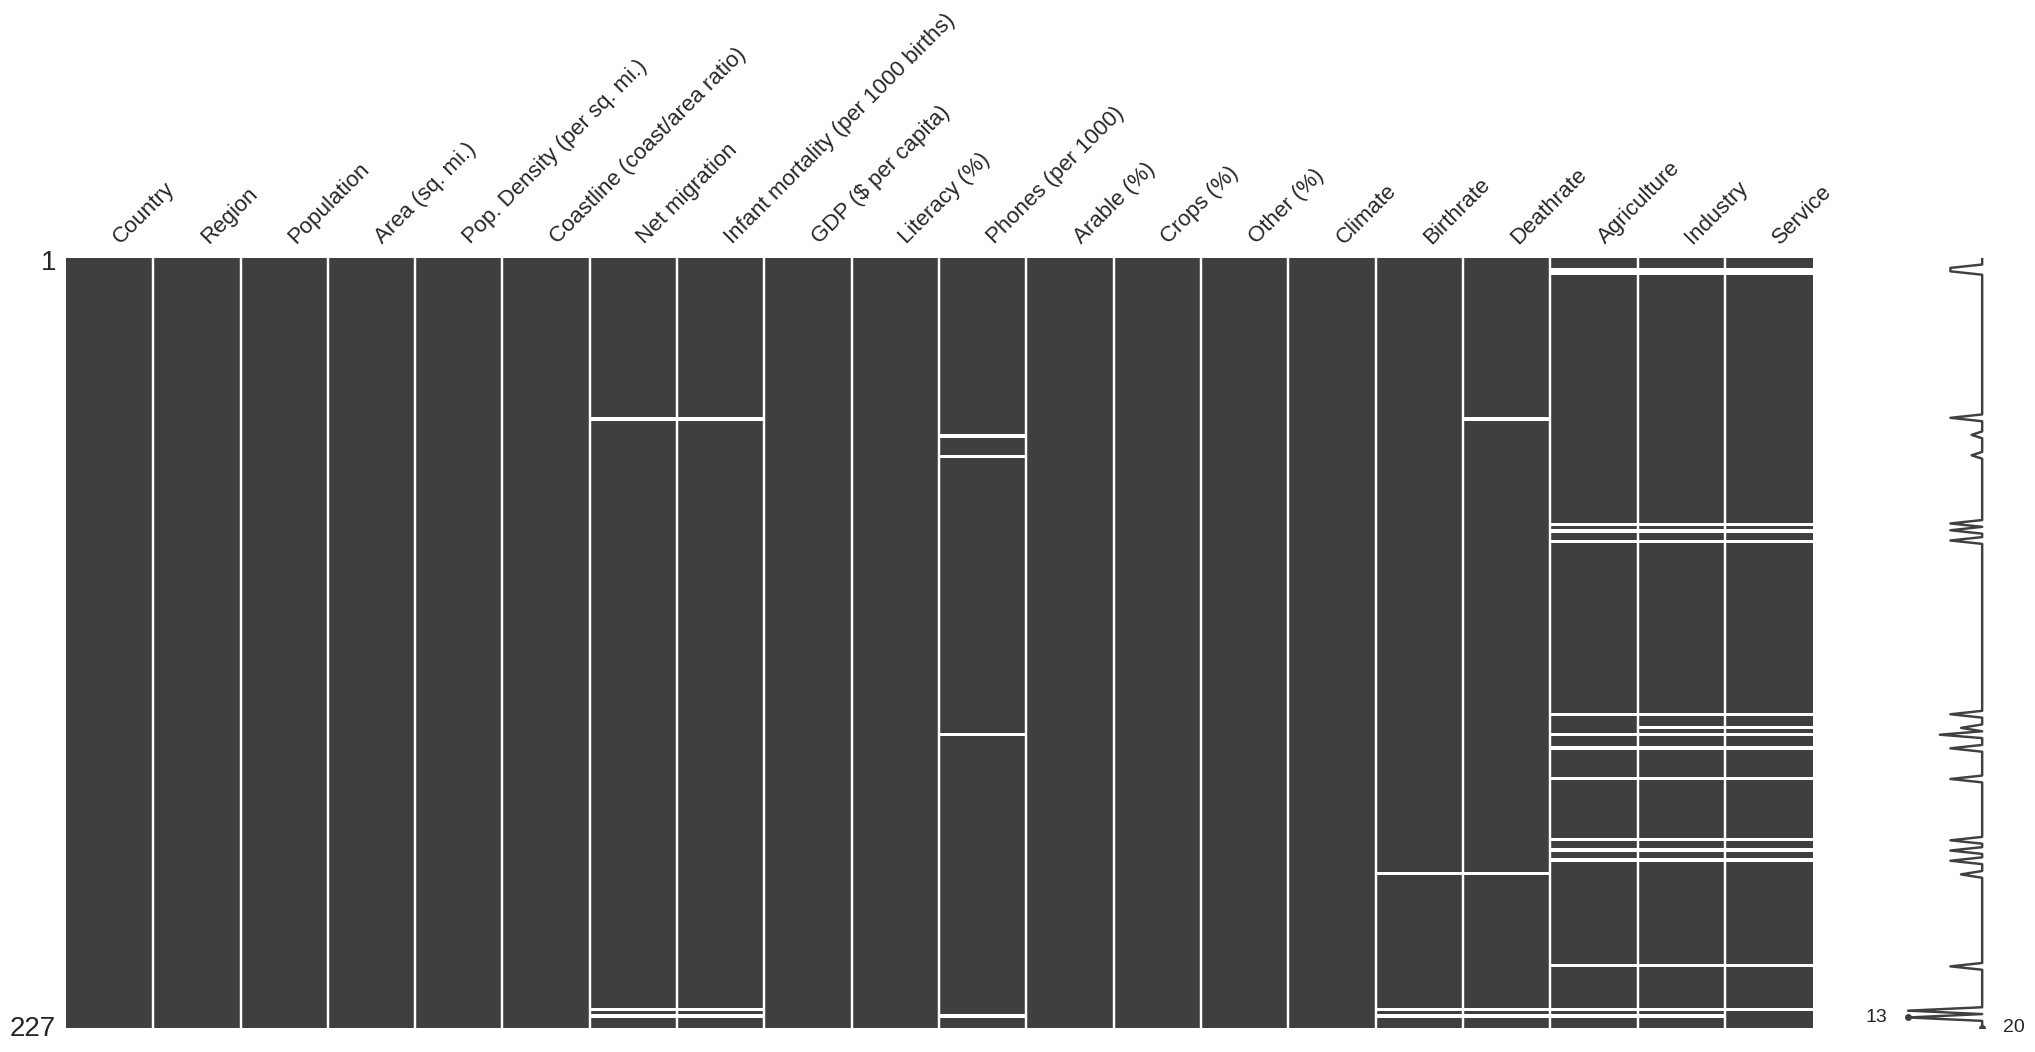

In [ ]:
msno.matrix(df)

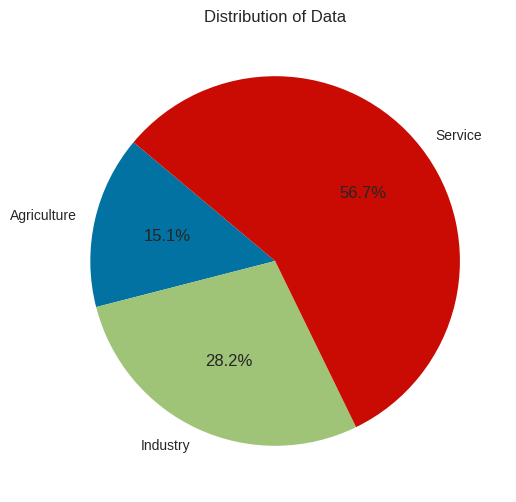

In [ ]:
category_labels = ['Agriculture', 'Industry', 'Service']
category_values = [df['Agriculture' ].sum(), df['Industry'].sum(), df['Service'].sum()]

plt.figure(figsize=(6, 6))
plt.pie(category_values, labels=category_labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Data')

plt.axis()
plt.show()

<Axes: xlabel='Agriculture', ylabel='Density'>

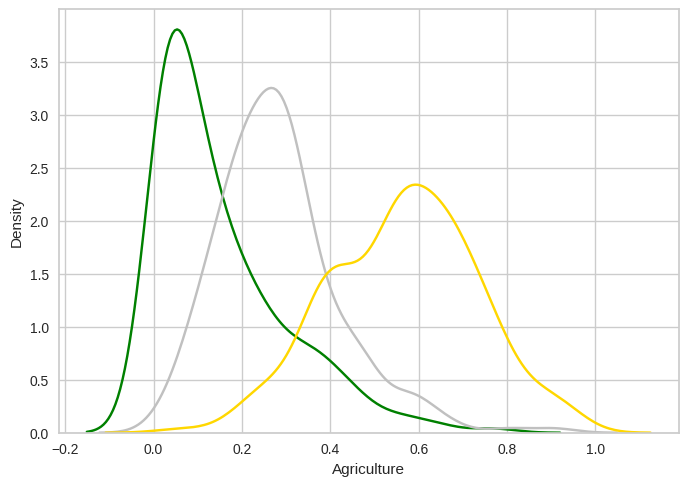

In [ ]:
sns.kdeplot(x=df['Agriculture'], color='green')
sns.kdeplot(x=df['Industry'], color='silver')
sns.kdeplot(x=df['Service'], color='gold')

In [ ]:
data = df[['Agriculture', 'Industry', 'Service']]
# Function to calculate the missing column
def calculate_missing_column(row):
    if not np.isnan(row['Agriculture']) and not np.isnan(row['Industry']):
        row['Service'] = 1 - row['Agriculture'] - row['Industry']
    elif not np.isnan(row['Agriculture']) and not np.isnan(row['Service']):
        row['Industry'] = 1 - row['Agriculture'] - row['Service']
    elif not np.isnan(row['Industry']) and not np.isnan(row['Service']):
        row['Agriculture'] = 1 - row['Industry'] - row['Service']
    return row

# Apply the function to calculate missing columns
data = data.apply(calculate_missing_column, axis=1)

# Use KNNImputer for remaining missing values
imputer = KNNImputer(n_neighbors=2)
data = imputer.fit_transform(data)

# Convert the result back to a DataFrame
data = pd.DataFrame(data, columns=['Agriculture', 'Industry', 'Service'])

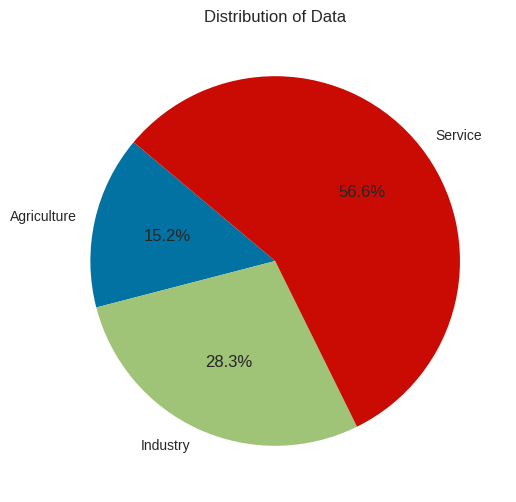

In [ ]:
category_labels = ['Agriculture', 'Industry', 'Service']
category_values = [data['Agriculture' ].sum(), data['Industry'].sum(), data['Service'].sum()]

plt.figure(figsize=(6, 6))
plt.pie(category_values, labels=category_labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Data')

plt.axis()
plt.show()

<Axes: xlabel='Agriculture', ylabel='Density'>

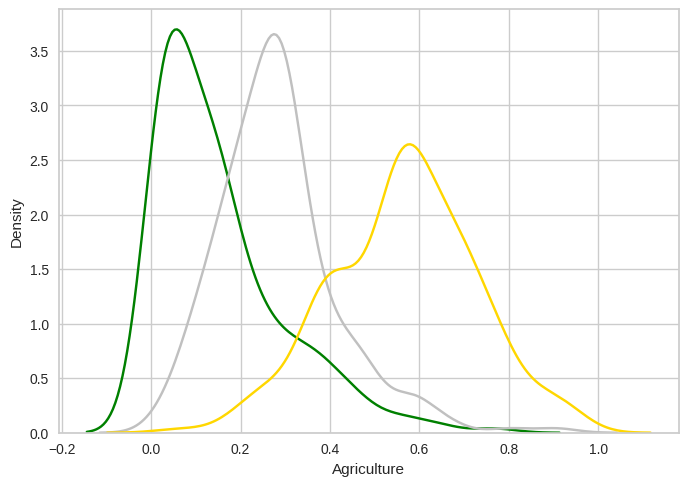

In [ ]:
#without missing
sns.kdeplot(x=data['Agriculture'], color='green')
sns.kdeplot(x=data['Industry'], color='silver')
sns.kdeplot(x=data['Service'], color='gold')

In [ ]:
df[['Agriculture', 'Industry', 'Service']]=data[['Agriculture', 'Industry', 'Service']]

<Axes: >

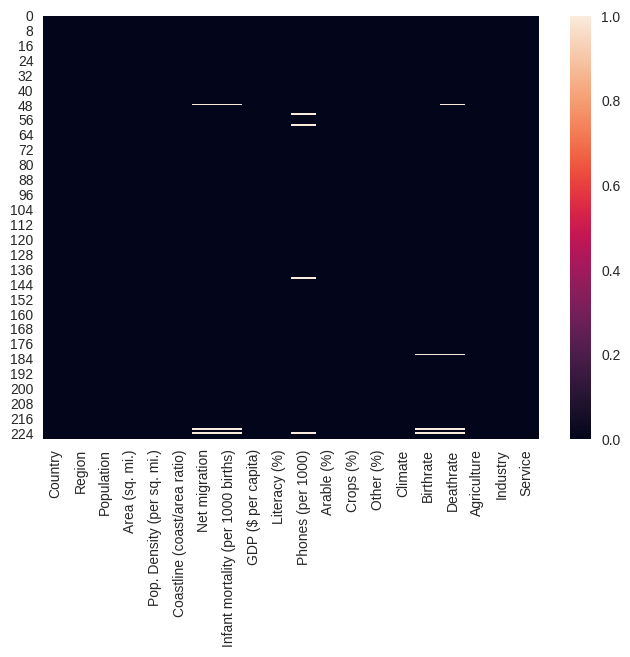

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         3
Infant mortality (per 1000 births)    3
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     4
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             3
Deathrate                             4
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

Text(0.5, 0, 'Deathrate')

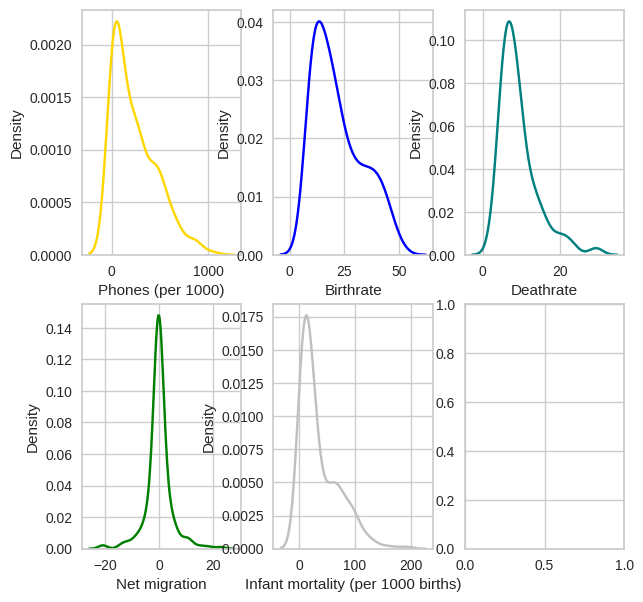

In [ ]:
#with missing
fig, axs = plt.subplots(2, 3, figsize=(7, 7))
sns.kdeplot(x=df['Net migration'], color='green', ax=axs[1, 0]). set_xlabel('Net migration')
sns.kdeplot(x=df['Infant mortality (per 1000 births)'], color='silver', ax=axs[1, 1]). set_xlabel('Infant mortality (per 1000 births)')
sns.kdeplot(x=df['Phones (per 1000)'], color='gold', ax=axs[0, 0]). set_xlabel('Phones (per 1000)')
sns.kdeplot(x=df['Birthrate'], color='blue', ax=axs[0, 1]). set_xlabel('Birthrate')
sns.kdeplot(x=df['Deathrate'], color='teal', ax=axs[0, 2]). set_xlabel('Deathrate')

In [ ]:
data =df.copy()
data =data.drop(['Country', 'Region'], axis=1)

In [ ]:
imp = IterativeImputer()
imputed =imp.fit_transform(data)
df_imputed = pd.DataFrame(imputed, columns=data.columns)
df_imputed

Population  Area (sq. mi.)  Pop. Density (per sq. mi.)  \
0    31056997.0        647500.0                        48.0   
1     3581655.0         28748.0                       124.6   
2    32930091.0       2381740.0                        13.8   
3       57794.0           199.0                       290.4   
4       71201.0           468.0                       152.1   
..          ...             ...                         ...   
222   2460492.0          5860.0                       419.9   
223    273008.0        266000.0                         1.0   
224  21456188.0        527970.0                        40.6   
225  11502010.0        752614.0                        15.3   
226  12236805.0        390580.0                        31.3   

     Coastline (coast/area ratio)  Net migration  \
0                            0.00       23.06000   
1                            1.26       -4.93000   
2                            0.04       -0.39000   
3                           58.29      -20.71000   
4                            0.00        6.60000   
..                            ...            ...   
222                          0.00        2.98000   
223                          0.42       -1.68467   
224                          0.36        0.00000   
225                          0.00        0.00000   
226                          0.00        0.00000   

     Infant mortality (per 1000 births)  GDP ($ per capita)  Literacy (%)  \
0                            163.070000               700.0         36.00   
1                             21.520000              4500.0         86.50   
2                             31.000000              6000.0         70.00   
3                              9.270000              8000.0         97.00   
4                              4.050000             19000.0        100.00   
..                                  ...                 ...           ...   
222                           19.620000               800.0         96.92   
223                           50.877681              2955.0         50.00   
224                           61.500000               800.0         50.20   
225                           88.290000               800.0         80.60   
226                           67.690000              1900.0         90.70   

     Phones (per 1000)  Arable (%)  Crops (%)  Other (%)  Climate  Birthrate  \
0             3.200000       12.13       0.22      87.65      1.0  46.600000   
1            71.200000       21.09       4.42      74.49      3.0  15.110000   
2            78.100000        3.22       0.25      96.53      1.0  17.140000   
3           259.500000       10.00      15.00      75.00      2.0  22.460000   
4           497.200000        2.22       0.00      97.78      3.0   8.710000   
..                 ...         ...        ...        ...      ...        ...   
222         145.200000       16.90      18.97      64.13      3.0  31.670000   
223          77.623941        0.02       0.00      99.98      1.0  30.066474   
224          37.200000        2.78       0.24      96.98      1.0  42.890000   
225           8.200000        7.08       0.03      92.90      2.0  41.000000   
226          26.800000        8.32       0.34      91.34      2.0  28.010000   

     Deathrate  Agriculture  Industry  Service  
0    20.340000     0.380000  0.240000  0.38000  
1     5.220000     0.232000  0.188000  0.58000  
2     4.610000     0.101000  0.600000  0.29900  
3     3.270000     0.150844  0.282711  0.56575  
4     6.250000     0.150844  0.282711  0.56575  
..         ...          ...       ...      ...  
222   3.920000     0.090000  0.280000  0.63000  
223   8.515158     0.316000  0.283000  0.40000  
224   8.300000     0.135000  0.472000  0.39300  
225  19.930000     0.220000  0.290000  0.49000  
226  21.840000     0.179000  0.243000  0.57800  

[227 rows x 18 columns]

In [ ]:
df[['Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service']] = df_imputed

Text(0.5, 0, 'Deathrate')

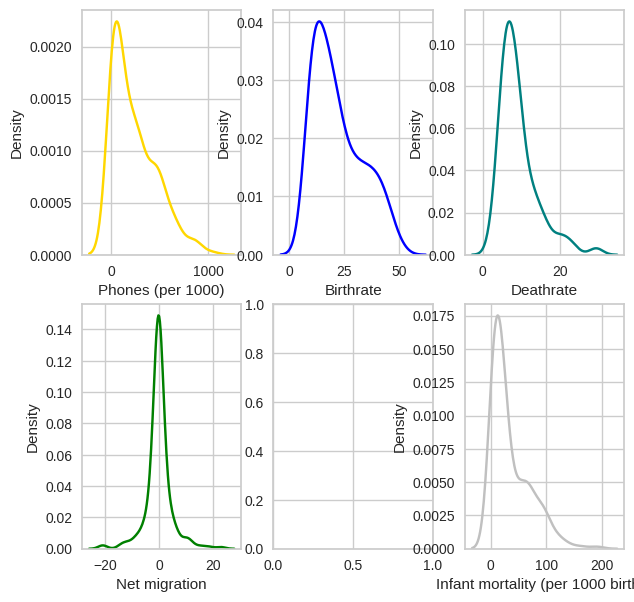

In [ ]:
#without missing
fig, axs = plt.subplots(2, 3, figsize=(7, 7))
sns.kdeplot(x=df['Net migration'], color='green', ax=axs[1, 0]). set_xlabel('Net migration')
sns.kdeplot(x=df['Infant mortality (per 1000 births)'], color='silver', ax=axs[1, 2]). set_xlabel('Infant mortality (per 1000 births)')
sns.kdeplot(x=df['Phones (per 1000)'], color='gold', ax=axs[0, 0]). set_xlabel('Phones (per 1000)')
sns.kdeplot(x=df['Birthrate'], color='blue', ax=axs[0, 1]). set_xlabel('Birthrate')
sns.kdeplot(x=df['Deathrate'], color='teal', ax=axs[0, 2]). set_xlabel('Deathrate')

<Axes: >

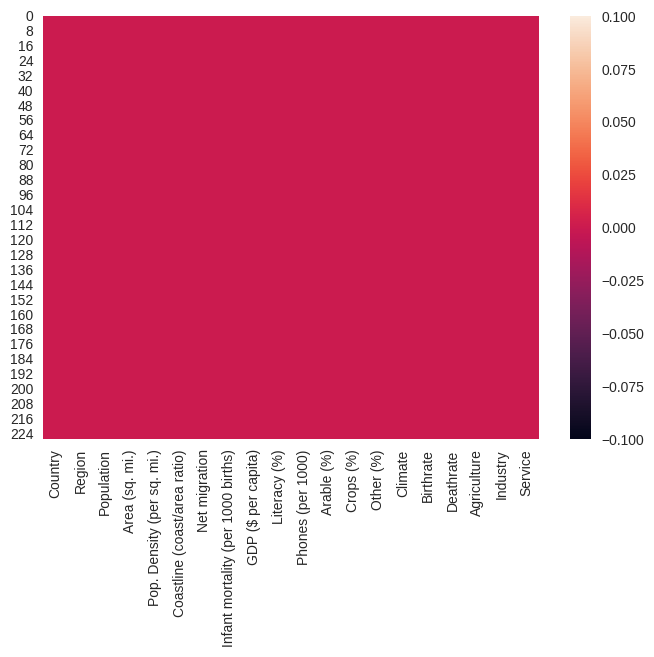

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    float64
 3   Area (sq. mi.)                      227 non-null    float64
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       227 non-null    float64
 7   Infant mortality (per 1000 births)  227 non-null    float64
 8   GDP ($ per capita)                  227 non-null    float64
 9   Literacy (%)                        227 non-null    float64
 10  Phones (per 1000)                   227 non-null    float64
 11  Arable (%)                          227 non-n

In [ ]:
df.Climate =df.Climate.astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    float64
 3   Area (sq. mi.)                      227 non-null    float64
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       227 non-null    float64
 7   Infant mortality (per 1000 births)  227 non-null    float64
 8   GDP ($ per capita)                  227 non-null    float64
 9   Literacy (%)                        227 non-null    float64
 10  Phones (per 1000)                   227 non-null    float64
 11  Arable (%)                          227 non-n

In [ ]:
corr = df.drop(['Country', 'Region'], axis = 1).corr()
corr

Population  Area (sq. mi.)  \
Population                            1.000000        0.469985   
Area (sq. mi.)                        0.469985        1.000000   
Pop. Density (per sq. mi.)           -0.028190       -0.066917   
Coastline (coast/area ratio)         -0.068199       -0.095627   
Net migration                         0.001125        0.048704   
Infant mortality (per 1000 births)    0.022426       -0.007630   
GDP ($ per capita)                   -0.038563        0.072659   
Literacy (%)                         -0.050328        0.027541   
Phones (per 1000)                    -0.029661        0.054097   
Arable (%)                            0.188051       -0.079820   
Crops (%)                            -0.060324       -0.143257   
Other (%)                            -0.120683        0.138739   
Climate                              -0.094030       -0.073550   
Birthrate                            -0.046319       -0.067451   
Deathrate                            -0.027092        0.041699   
Agriculture                          -0.000867       -0.051183   
Industry                              0.099415        0.121332   
Service                              -0.081663       -0.055283   

                                    Pop. Density (per sq. mi.)  \
Population                                           -0.028190   
Area (sq. mi.)                                       -0.066917   
Pop. Density (per sq. mi.)                            1.000000   
Coastline (coast/area ratio)                          0.241690   
Net migration                                         0.178757   
Infant mortality (per 1000 births)                   -0.144625   
GDP ($ per capita)                                    0.196232   
Literacy (%)                                          0.099395   
Phones (per 1000)                                     0.279901   
Arable (%)                                           -0.080741   
Crops (%)                                            -0.032054   
Other (%)                                             0.081853   
Climate                                               0.071220   
Birthrate                                            -0.159613   
Deathrate                                            -0.068907   
Agriculture                                          -0.106779   
Industry                                             -0.118439   
Service                                               0.192346   

                                    Coastline (coast/area ratio)  \
Population                                             -0.068199   
Area (sq. mi.)                                         -0.095627   
Pop. Density (per sq. mi.)                              0.241690   
Coastline (coast/area ratio)                            1.000000   
Net migration                                          -0.134630   
Infant mortality (per 1000 births)                     -0.136837   
GDP ($ per capita)                                      0.049912   
Literacy (%)                                            0.127129   
Phones (per 1000)                                       0.152200   
Arable (%)                                             -0.120206   
Crops (%)                                               0.340431   
Other (%)                                              -0.079249   
Climate                                                 0.000825   
Birthrate                                              -0.073822   
Deathrate                                              -0.162067   
Agriculture                                            -0.029873   
Industry                                               -0.188525   
Service                                                 0.182620   

                                    Net migration  \
Population                               0.001125   
Area (sq. mi.)                           0.048704   
Pop. Density (per sq. mi.)               0.178757   
Coastline (coast/area

<Axes: >

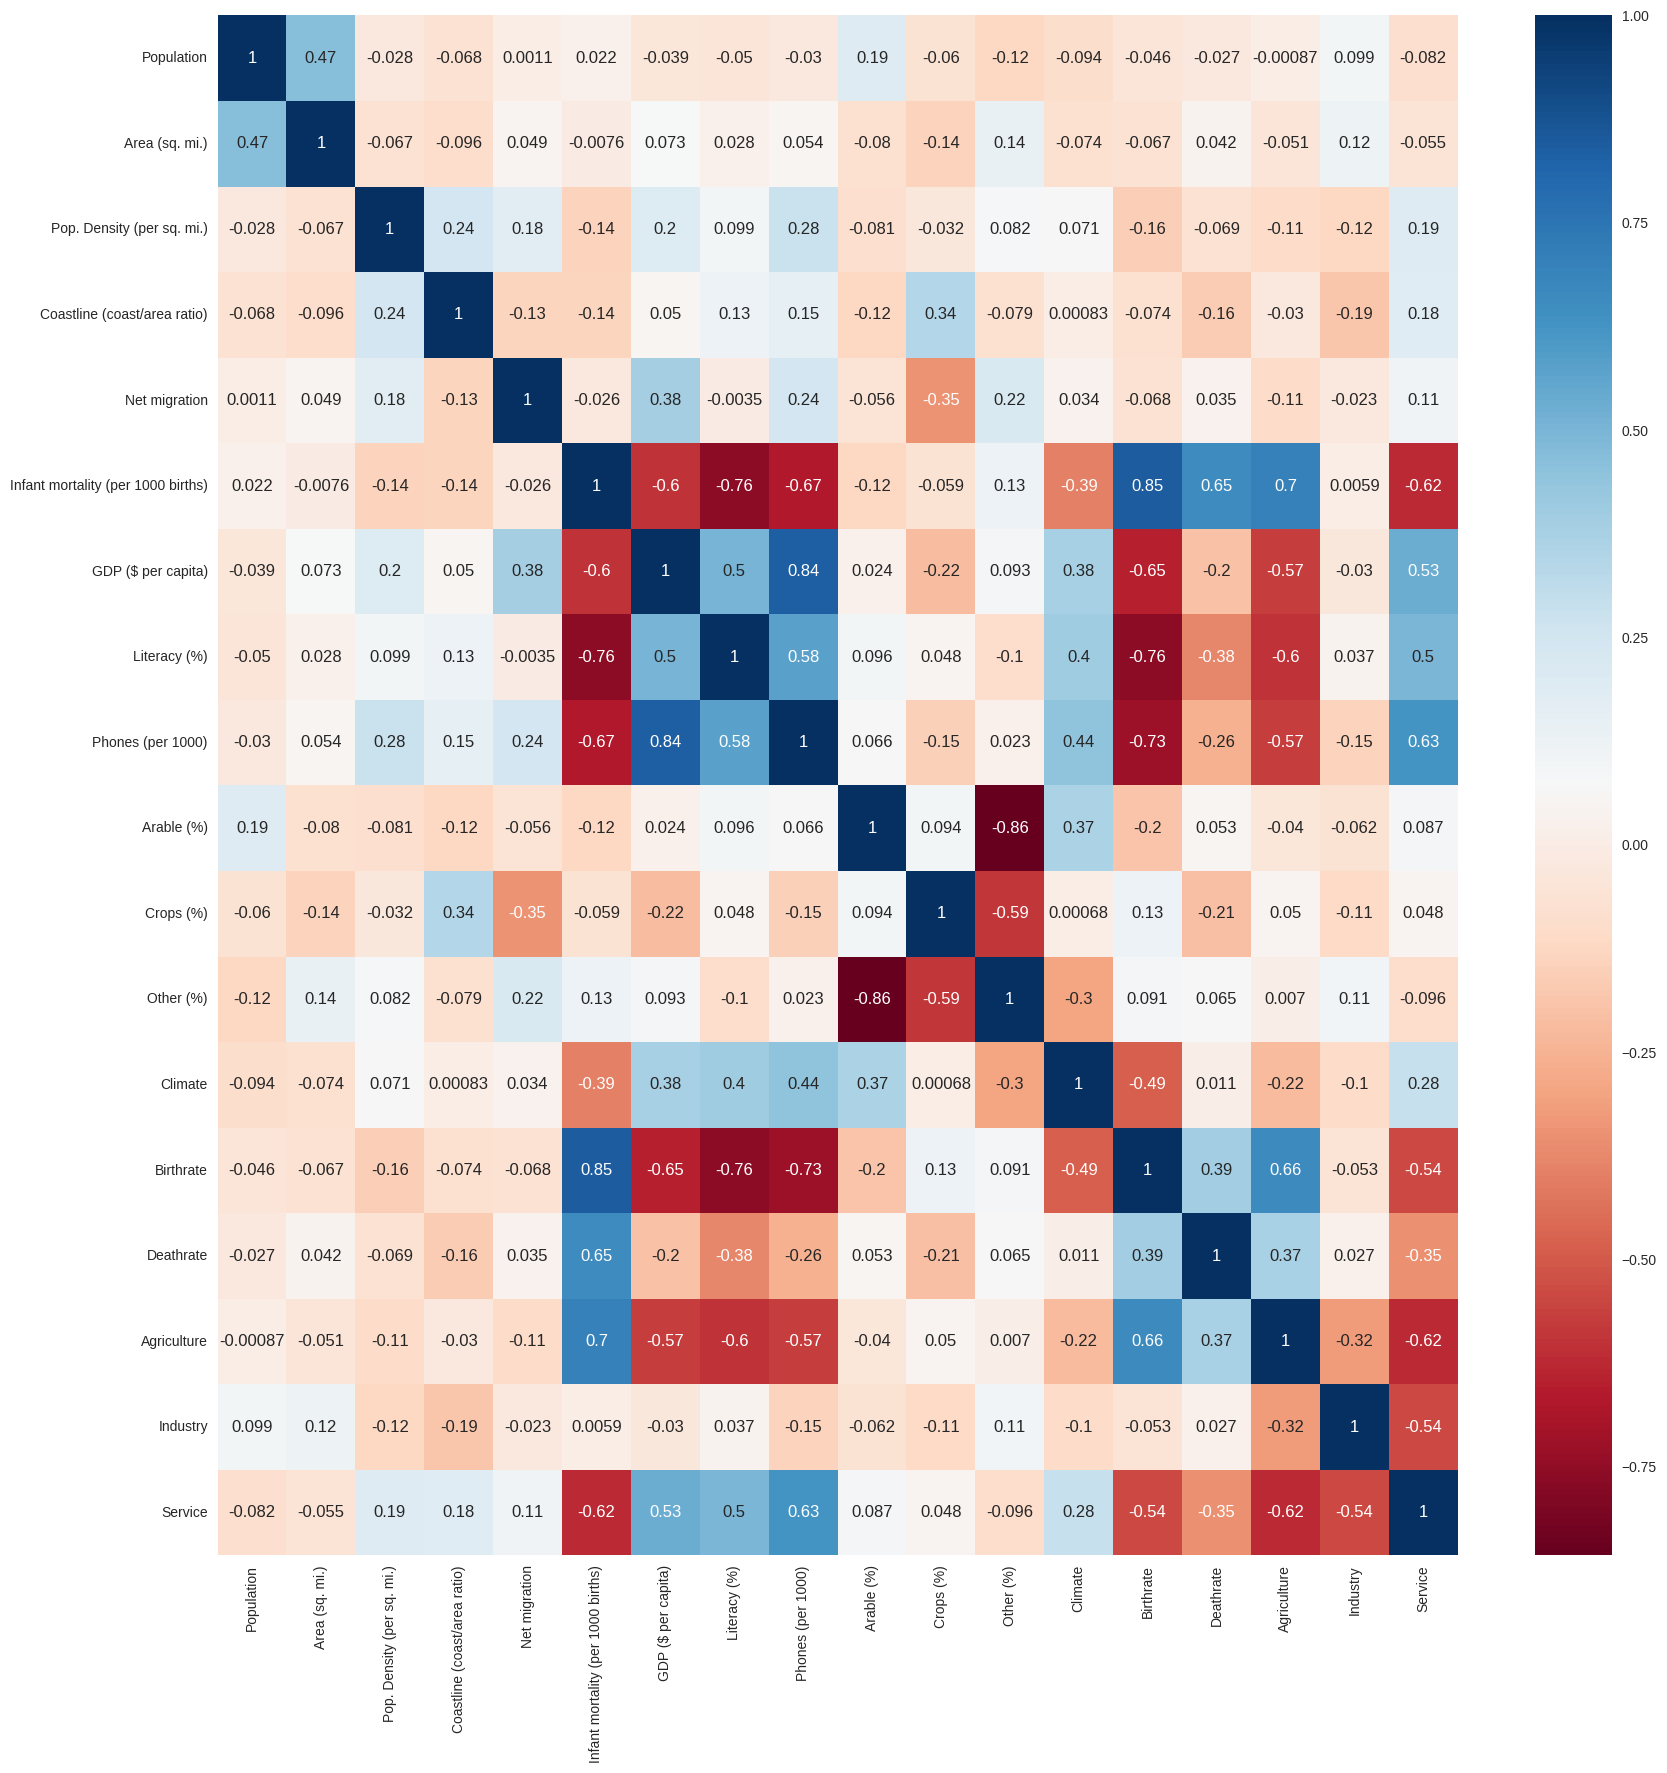

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot = True, cmap = 'RdBu')

<Axes: xlabel='Phones (per 1000)', ylabel='GDP ($ per capita)'>

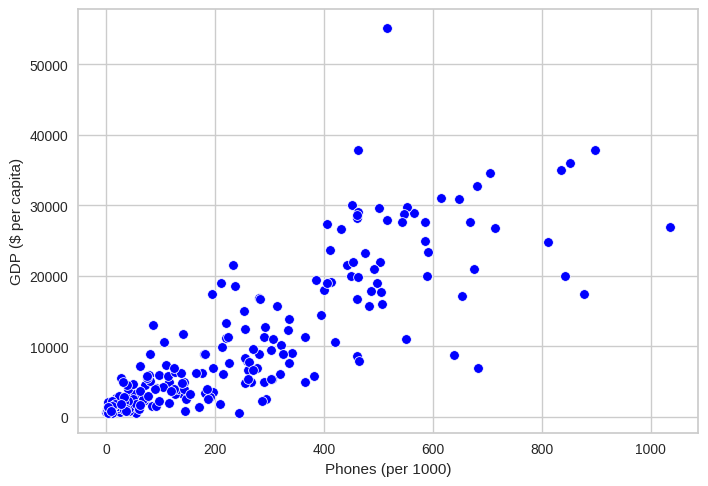

In [ ]:
sns.scatterplot(data = df, x = 'Phones (per 1000)', y = 'GDP ($ per capita)', color = 'blue')

In [ ]:
# Create a function to convert country names to alpha-3 codes
def country_to_alpha3(country_name):
    try:
        alpha3 = coco.convert(names=country_name, to='ISO3' ,not_found=np.nan)
        if alpha3:
            return alpha3
        else:
            return None
    except Exception as e:
        return None

# Apply the function to the 'Country' column to create a new 'Country Code' column
df['Country Code'] = df['Country'].apply(country_to_alpha3)

# Display the DataFrame with 'Country' and 'Country Code' columns
print(df[['Country', 'Country Code']])

             Country Country Code
0       Afghanistan           AFG
1           Albania           ALB
2           Algeria           DZA
3    American Samoa           ASM
4           Andorra           AND
..               ...          ...
222       West Bank           PSE
223  Western Sahara           ESH
224           Yemen           YEM
225          Zambia           ZMB
226        Zimbabwe           ZWE

[227 rows x 2 columns]


In [ ]:
df['Country Code'].isnull().sum()

2

In [ ]:
df[df['Country Code'].isnull()==True]

Country                   Region  Population  \
147  Netherlands Antilles   LATIN AMER. & CARIB        221736.0   
220        Virgin Islands   LATIN AMER. & CARIB        108605.0   

     Area (sq. mi.)  Pop. Density (per sq. mi.)  Coastline (coast/area ratio)  \
147           960.0                       231.0                         37.92   
220          1910.0                        56.9                          9.84   

     Net migration  Infant mortality (per 1000 births)  GDP ($ per capita)  \
147          -0.41                               10.03             11400.0   
220          -8.94                                8.03             17200.0   

     Literacy (%)  ...  Arable (%)  Crops (%)  Other (%)  Climate  Birthrate  \
147          96.7  ...       10.00       0.00       90.0        2      14.78   
220          97.8  ...       11.76       2.94       85.3        2      13.96   

     Deathrate  Agriculture  Industry  Service  Country Code  
147       6.45         0.01      0.15     0.84           NaN  
220       6.43         0.01      0.19     0.80           NaN  

[2 rows x 21 columns]

In [ ]:
df.loc[220,'Country Code' ] ='VIR'
df.loc[147,'Country Code'] ='ANT'

In [ ]:
df['Country Code'].isnull().sum()

0

In [ ]:
fig = px.choropleth(df, locations="Country Code",
                    color='GDP ($ per capita)',
                    hover_name='Country', # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.show()

<Axes: title={'center': 'GDP per capita per region'}, xlabel='Region', ylabel='GDP ($ per capita)'>

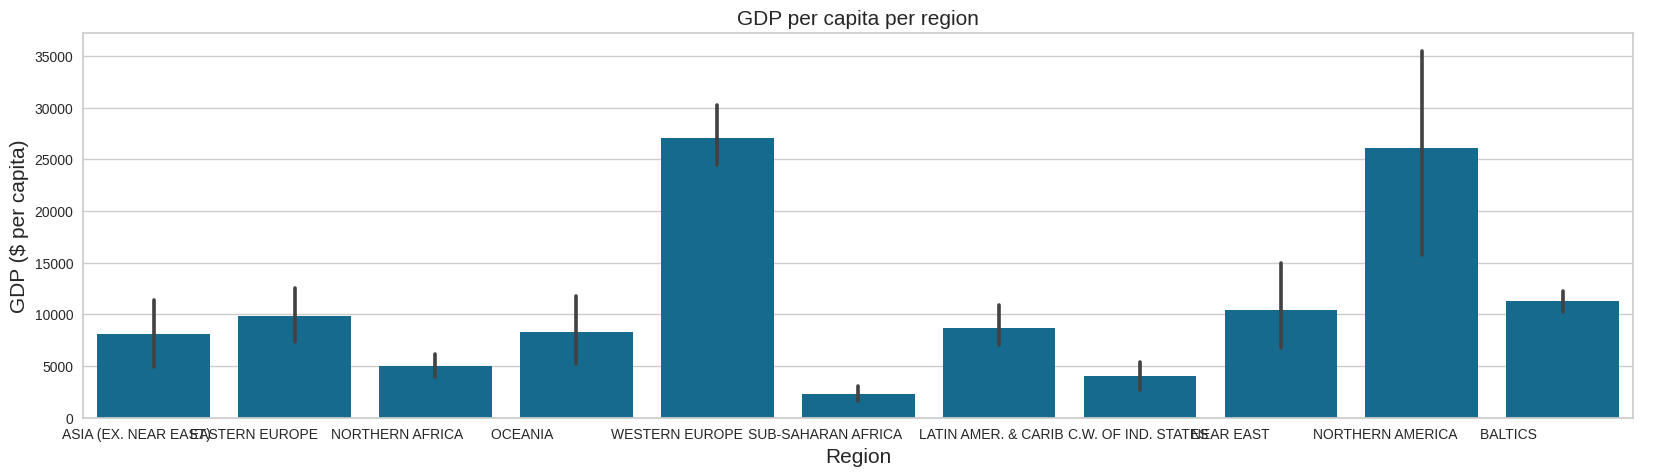

In [ ]:
plt.figure(figsize=(20, 5))
plt.title('GDP per capita per region', fontsize=15)
plt.xticks(fontsize=10, rotation =0)
plt.ylabel('GDP ($ per capita)', fontsize=15)
plt.yticks(fontsize=10)
plt.xlabel('Region', fontsize=15)
sns.barplot(data = df, x = 'Region', y = 'GDP ($ per capita)')

In [ ]:
Regions_by_Area = df.groupby('Region').sum().sort_values('Area (sq. mi.)', ascending = False)
Regions_by_Area = Regions_by_Area['Area (sq. mi.)']
Regions_by_Area

Region
SUB-SAHARAN AFRICA                     24341406.0
ASIA (EX. NEAR EAST)                   23096712.0
C.W. OF IND. STATES                    22100843.0
NORTHERN AMERICA                       21782471.0
LATIN AMER. & CARIB                    20544084.0
OCEANIA                                 8519812.0
NORTHERN AFRICA                         6018890.0
NEAR EAST                               4355586.0
WESTERN EUROPE                          3710478.0
EASTERN EUROPE                          1152222.0
BALTICS                                  175015.0
Name: Area (sq. mi.), dtype: float64

<Axes: title={'center': 'GDP per capita per Area'}, ylabel='Region'>

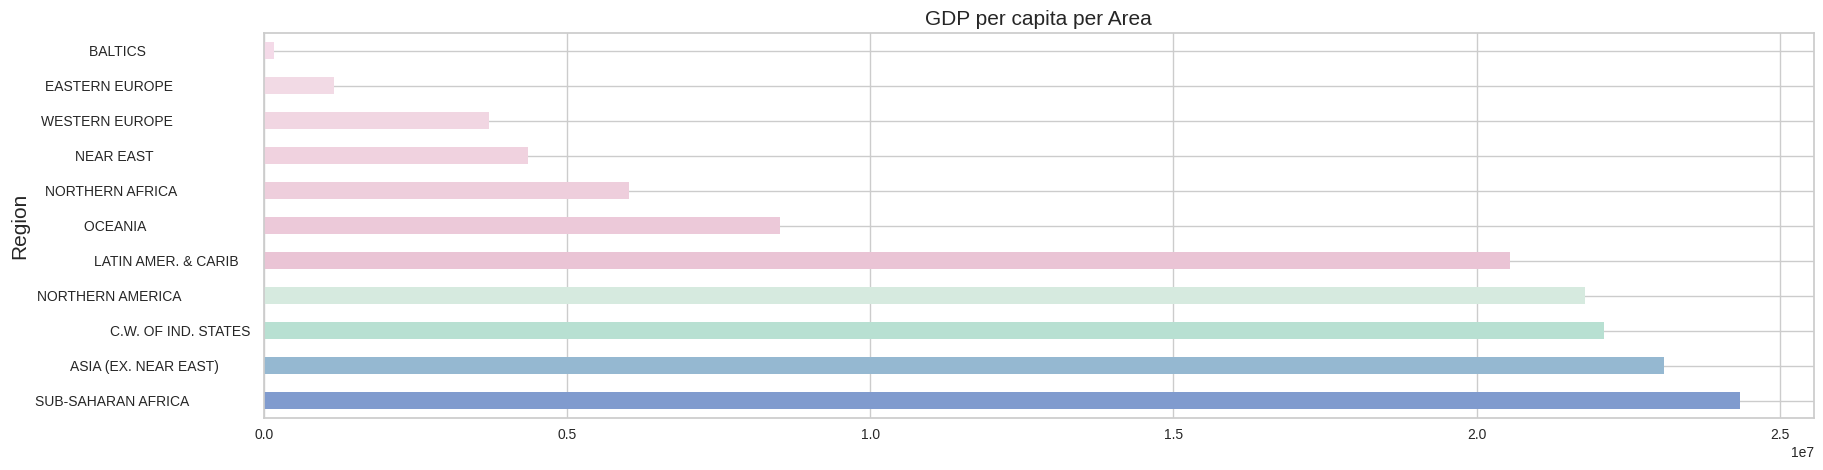

In [ ]:
plt.figure(figsize=(20, 5))
plt.title('GDP per capita per Area', fontsize=15)
plt.ylabel('GDP ($ per capita)', fontsize=15)
plt.yticks(fontsize=10)
Regions_by_Area.plot(kind = 'barh', color = ['#809BCE', '#95B8D1', '#B8E0D2', '#D6EADF', '#EAC4D5', '#ECC9D9', '#EECEDC', '#F0D2DF', '#F1D6E2', '#F2DAE5', '#F4DAE8'])

In [ ]:
df[['Birthrate', 'Deathrate', 'Infant mortality (per 1000 births)', 'GDP ($ per capita)']]

Birthrate  Deathrate  Infant mortality (per 1000 births)  \
0    46.600000  20.340000                          163.070000   
1    15.110000   5.220000                           21.520000   
2    17.140000   4.610000                           31.000000   
3    22.460000   3.270000                            9.270000   
4     8.710000   6.250000                            4.050000   
..         ...        ...                                 ...   
222  31.670000   3.920000                           19.620000   
223  30.066474   8.515158                           50.877681   
224  42.890000   8.300000                           61.500000   
225  41.000000  19.930000                           88.290000   
226  28.010000  21.840000                           67.690000   

     GDP ($ per capita)  
0                 700.0  
1                4500.0  
2                6000.0  
3                8000.0  
4               19000.0  
..                  ...  
222               800.0  
223              2955.0  
224               800.0  
225               800.0  
226              1900.0  

[227 rows x 4 columns]

<Axes: xlabel='Infant mortality (per 1000 births)', ylabel='GDP ($ per capita)'>

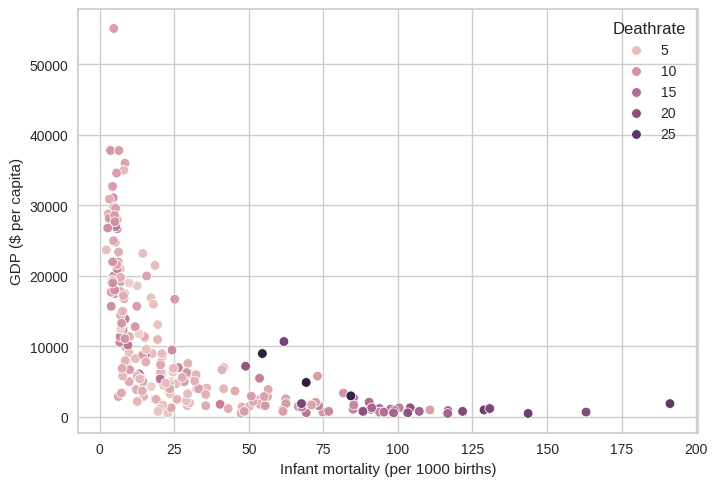

In [ ]:
sns.scatterplot(data = df, x = 'Infant mortality (per 1000 births)', y = 'GDP ($ per capita)', color = 'red', hue = 'Deathrate')

In [ ]:
df2=df.copy()

In [ ]:
df2.groupby('Country').sum()['GDP ($ per capita)'].sort_values(ascending =False)

Country
Luxembourg         55100.0
United States      37800.0
Norway             37800.0
Bermuda            36000.0
Cayman Islands     35000.0
                    ...   
Burundi              600.0
Malawi               600.0
East Timor           500.0
Somalia              500.0
Sierra Leone         500.0
Name: GDP ($ per capita), Length: 227, dtype: float64

In [ ]:
df2= df.copy()

In [ ]:
df2['population increase rate'] = df2['Birthrate'] - df2['Deathrate']

In [ ]:
pop_decrease = df2[df2['population increase rate']<=0]

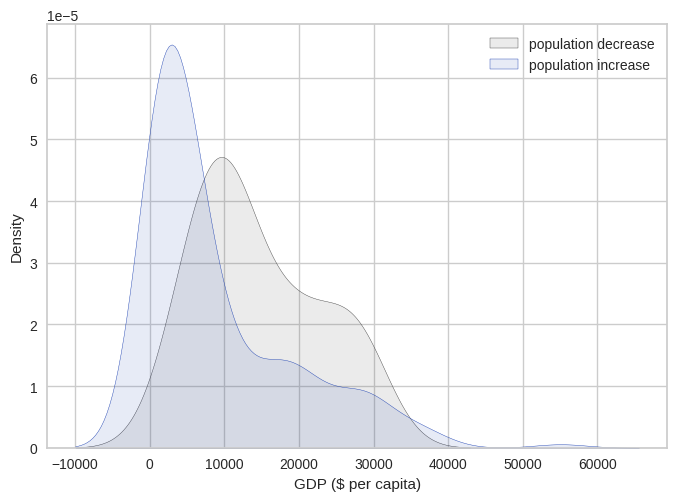

In [ ]:
sns.kdeplot(x= pop_decrease['GDP ($ per capita)'], color='#3f3f3f', fill=True, alpha=0.1, label ='population decrease')
sns.kdeplot(x= df2[df2['population increase rate']>0]['GDP ($ per capita)'], color ='#193eb0', fill=True, alpha=0.1, label ='population increase')
plt.legend()

In [ ]:
df2['pop_decrease'] = df2['population increase rate']
df2['pop_decrease']= np.where(df2['pop_decrease'] <= 0, 'yes', 'no')

In [ ]:
df2['pop_decrease'].value_counts()

pop_decrease
no     202
yes     25
Name: count, dtype: int64

In [ ]:
top =df2.groupby('Country').sum()['GDP ($ per capita)'].sort_values(ascending =False).head(50).index
worst =df2.groupby('Country').sum()['GDP ($ per capita)'].sort_values(ascending =False).tail(50).index
df2['Top_Worst'] = df['Country'].apply(lambda x: 'Top' if x in top else ('Worst' if x in worst else 'Other'))

In [ ]:
fig = px.scatter(df2, x='population increase rate', y='Infant mortality (per 1000 births)', color='Top_Worst' , title="Scatter Plot")
fig.update_layout(
    title="Population increase rate vs Infant mortality",
    height=400
)
fig.show()

In [ ]:
group_by_Etype = df.groupby('Country').sum().sort_values('GDP ($ per capita)', ascending = False)[['Agriculture', 'Industry', 'Service']]
# group_by_Etype.concat()
group_by_Etype

Agriculture  Industry  Service
Country                                        
Luxembourg             0.010     0.130    0.860
United States          0.010     0.204    0.786
Norway                 0.021     0.415    0.564
Bermuda                0.010     0.100    0.890
Cayman Islands         0.014     0.032    0.954
...                      ...       ...      ...
Burundi                0.463     0.203    0.334
Malawi                 0.342     0.158    0.500
East Timor             0.085     0.231    0.684
Somalia                0.650     0.100    0.250
Sierra Leone           0.490     0.310    0.200

[227 rows x 3 columns]

In [ ]:
top10 = group_by_Etype.head(10)
top10

Agriculture  Industry  Service
Country                                        
Luxembourg          0.010000  0.130000  0.86000
United States       0.010000  0.204000  0.78600
Norway              0.021000  0.415000  0.56400
Bermuda             0.010000  0.100000  0.89000
Cayman Islands      0.014000  0.032000  0.95400
San Marino          0.150844  0.282711  0.56575
Switzerland         0.015000  0.340000  0.64500
Denmark             0.018000  0.246000  0.73600
Iceland             0.086000  0.150000  0.76400
Austria             0.018000  0.304000  0.67800

In [ ]:
group_by_Etype.index

Index(['Luxembourg ', 'United States ', 'Norway ', 'Bermuda ',
       'Cayman Islands ', 'San Marino ', 'Switzerland ', 'Denmark ',
       'Iceland ', 'Austria ',
       ...
       'Comoros ', 'Ethiopia ', 'Afghanistan ', 'Gaza Strip ', 'Tanzania ',
       'Burundi ', 'Malawi ', 'East Timor ', 'Somalia ', 'Sierra Leone '],
      dtype='object', name='Country', length=227)

In [ ]:
Egy_E= df[df['Country Code'] =='EGY'].groupby('Country').sum().sort_values('GDP ($ per capita)', ascending = False)[['Agriculture', 'Industry', 'Service']]

In [ ]:
Egy_E

Agriculture  Industry  Service
Country                                
Egypt          0.149     0.357    0.494

array([<Axes: ylabel='Egypt '>], dtype=object)

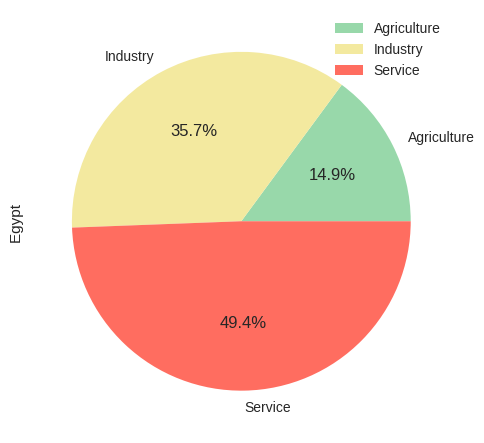

In [ ]:
Egy_E.T.plot.pie(autopct = "%1.1f%%", subplots=True, colors= ['#98D8AA','#F3E99F','#FF6D60'])

In [ ]:
group_by_Etype = pd.concat([top10,Egy_E ])

<Figure size 1000x600 with 0 Axes>

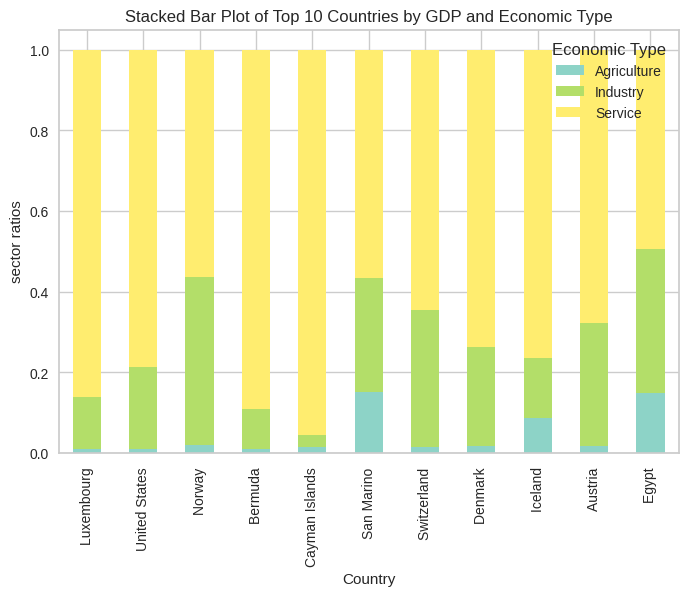

In [ ]:
plt.figure(figsize=(10, 6))
ax = group_by_Etype.plot(kind='bar', stacked=True, colormap='Set3')

# Customize the plot
plt.xlabel('Country')
plt.ylabel('sector ratios')
plt.title('Stacked Bar Plot of Top 10 Countries by GDP and Economic Type')

# Add a legend
plt.legend(title='Economic Type', loc='upper right')

# Show the plot
plt.show()

In [ ]:
dfc = df.copy()
dfc[['Agriculture', 'Industry', 'Service']] = dfc[['Agriculture', 'Industry', 'Service']]*100

In [ ]:
fig = px.choropleth(dfc, locations="Country Code",
                    color='Agriculture',
                    hover_name='Country', # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Aggrnyl_r)
fig.show()

In [ ]:
fig = px.choropleth(dfc, locations="Country Code",
                    color='Industry',
                    hover_name='Country', # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Burg)
fig.show()

In [ ]:
fig = px.choropleth(dfc, locations="Country Code",
                    color='Service',
                    hover_name='Country', # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Agsunset)
fig.show()

In [ ]:
df.groupby('Country').sum().sort_values('GDP ($ per capita)', ascending = False).head(10)[['GDP ($ per capita)','Area (sq. mi.)','Coastline (coast/area ratio)','Arable (%)','Crops (%)','Other (%)']]

GDP ($ per capita)  Area (sq. mi.)  \
Country                                               
Luxembourg                  55100.0          2586.0   
United States               37800.0       9631420.0   
Norway                      37800.0        323802.0   
Bermuda                     36000.0            53.0   
Cayman Islands              35000.0           262.0   
San Marino                  34600.0            61.0   
Switzerland                 32700.0         41290.0   
Denmark                     31100.0         43094.0   
Iceland                     30900.0        103000.0   
Austria                     30000.0         83870.0   

                 Coastline (coast/area ratio)  Arable (%)  Crops (%)  \
Country                                                                
Luxembourg                               0.00       23.28       0.40   
United States                            0.21       19.13       0.22   
Norway                                   7.77        2.87       0.00   
Bermuda                                194.34       20.00       0.00   
Cayman Islands                          61.07        3.85       0.00   
San Marino                               0.00       16.67       0.00   
Switzerland                              0.00       10.42       0.61   
Denmark                                 16.97       54.02       0.19   
Iceland                                  4.83        0.07       0.00   
Austria                                  0.00       16.91       0.86   

                 Other (%)  
Country                     
Luxembourg           76.32  
United States        80.65  
Norway               97.13  
Bermuda              80.00  
Cayman Islands       96.15  
San Marino           83.33  
Switzerland          88.97  
Denmark              45.79  
Iceland              99.93  
Austria              82.23

In [ ]:
group_by_Gtype = df.groupby('Country').sum().sort_values('GDP ($ per capita)', ascending = False).head(10)[['Arable (%)','Crops (%)','Other (%)']]
# Gtype : Geography Type

In [ ]:
Egy_G= df[df['Country Code'] =='EGY'].groupby('Country').sum().sort_values('GDP ($ per capita)', ascending = False)[['Arable (%)','Crops (%)','Other (%)']]

In [ ]:
Egy_G

Arable (%)  Crops (%)  Other (%)
Country                                  
Egypt          2.87       0.48      96.65

In [ ]:
group_by_Gtype = pd.concat([group_by_Gtype,Egy_G])
group_by_Gtype

Arable (%)  Crops (%)  Other (%)
Country                                          
Luxembourg            23.28       0.40      76.32
United States         19.13       0.22      80.65
Norway                 2.87       0.00      97.13
Bermuda               20.00       0.00      80.00
Cayman Islands         3.85       0.00      96.15
San Marino            16.67       0.00      83.33
Switzerland           10.42       0.61      88.97
Denmark               54.02       0.19      45.79
Iceland                0.07       0.00      99.93
Austria               16.91       0.86      82.23
Egypt                  2.87       0.48      96.65

<Figure size 1000x600 with 0 Axes>

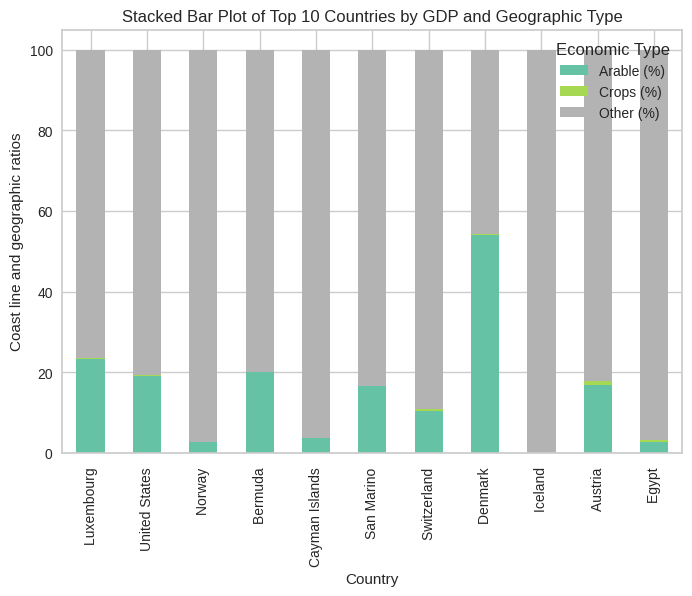

In [ ]:
plt.figure(figsize=(10, 6))
ax = group_by_Gtype.plot(kind='bar', stacked=True, colormap='Set2')

# Customize the plot
plt.xlabel('Country')
plt.ylabel('Coast line and geographic ratios')
plt.title('Stacked Bar Plot of Top 10 Countries by GDP and Geographic Type')

# Add a legend
plt.legend(title='Economic Type', loc='upper right')

# Show the plot
plt.show()

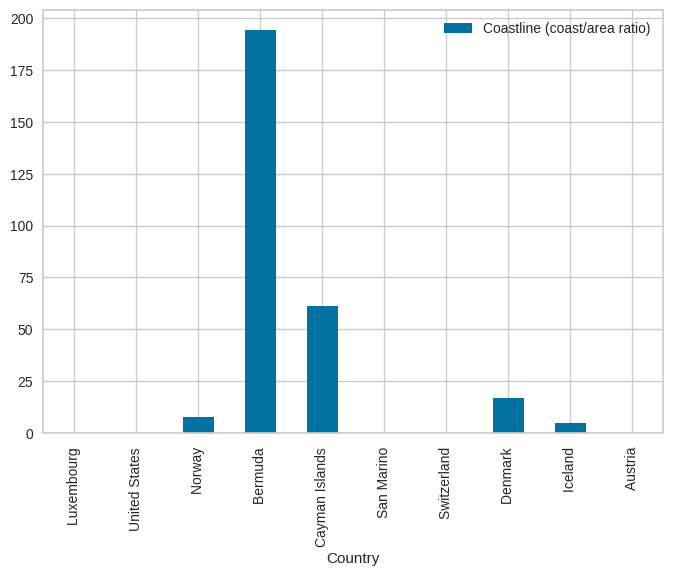

In [ ]:
group_by_Gtype = df.groupby('Country').sum().sort_values('GDP ($ per capita)', ascending = False).head(10)[['Coastline (coast/area ratio)']].plot(kind = 'bar')

<Axes: >

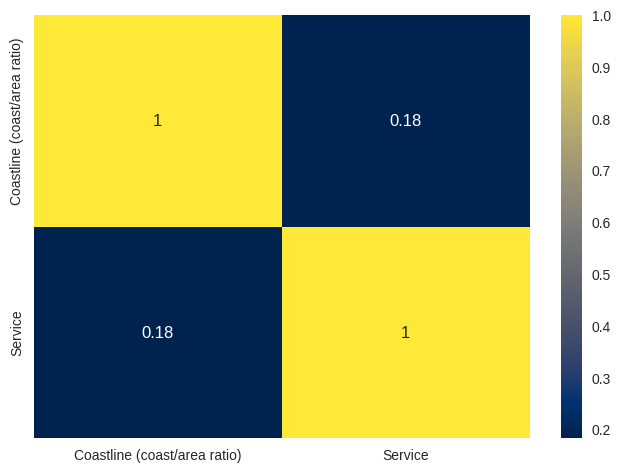

In [ ]:
sns.heatmap(df[['Coastline (coast/area ratio)', 'Service']].corr(), annot = True, cmap = 'cividis')

In [ ]:
fig = px.scatter(df, x='Coastline (coast/area ratio)', y='Service', title="Scatter Plot")
fig.update_layout(
    title="Coastline ratios vs Service percent",
    height=400
)
fig.show()

In [ ]:
df.groupby('Country').sum().sort_values('GDP ($ per capita)', ascending = False).head(10)[['Population','Area (sq. mi.)','Pop. Density (per sq. mi.)']]


Population  Area (sq. mi.)  Pop. Density (per sq. mi.)
Country                                                                 
Luxembourg          474413.0          2586.0                       183.5
United States    298444215.0       9631420.0                        31.0
Norway             4610820.0        323802.0                        14.2
Bermuda              65773.0            53.0                      1241.0
Cayman Islands       45436.0           262.0                       173.4
San Marino           29251.0            61.0                       479.5
Switzerland        7523934.0         41290.0                       182.2
Denmark            5450661.0         43094.0                       126.5
Iceland             299388.0        103000.0                         2.9
Austria            8192880.0         83870.0                        97.7

In [ ]:
group_by_Ptype = df.groupby('Country').sum().sort_values('GDP ($ per capita)', ascending = False).head(10)[['Population']]

In [ ]:
Egy_P= df[df['Country Code'] =='EGY'].groupby('Country').sum().sort_values('GDP ($ per capita)', ascending = False)[['Population']]

In [ ]:
group_by_Ptype = pd.concat([group_by_Ptype,Egy_P])
group_by_Ptype

Population
Country                     
Luxembourg          474413.0
United States    298444215.0
Norway             4610820.0
Bermuda              65773.0
Cayman Islands       45436.0
San Marino           29251.0
Switzerland        7523934.0
Denmark            5450661.0
Iceland             299388.0
Austria            8192880.0
Egypt             78887007.0

<Axes: xlabel='Country'>

<Figure size 1000x600 with 0 Axes>

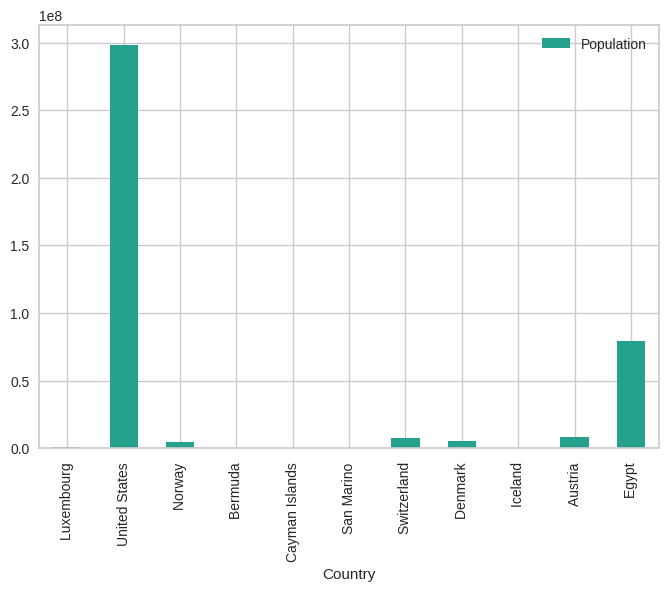

In [ ]:
plt.figure(figsize=(10, 6))
group_by_Ptype.plot(kind = 'bar', color = '#25A18E')

In [ ]:
df_GDP = df.copy()
df_GDP['Total GDP'] = df_GDP['Population']*df_GDP['GDP ($ per capita)']
df_GDP[['Population','GDP ($ per capita)', 'Total GDP']]

Population  GDP ($ per capita)     Total GDP
0    31056997.0               700.0  2.173990e+10
1     3581655.0              4500.0  1.611745e+10
2    32930091.0              6000.0  1.975805e+11
3       57794.0              8000.0  4.623520e+08
4       71201.0             19000.0  1.352819e+09
..          ...                 ...           ...
222   2460492.0               800.0  1.968394e+09
223    273008.0              2955.0  8.067386e+08
224  21456188.0               800.0  1.716495e+10
225  11502010.0               800.0  9.201608e+09
226  12236805.0              1900.0  2.324993e+10

[227 rows x 3 columns]

In [ ]:
df_GDP.groupby('Country').sum().sort_values('Total GDP', ascending = False).head(10)[['Population','Area (sq. mi.)','Pop. Density (per sq. mi.)', 'Arable (%)','Crops (%)']]

Population  Area (sq. mi.)  Pop. Density (per sq. mi.)  \
Country                                                                     
United States    2.984442e+08       9631420.0                        31.0   
China            1.313974e+09       9596960.0                       136.9   
Japan            1.274636e+08        377835.0                       337.4   
India            1.095352e+09       3287590.0                       333.2   
Germany          8.242230e+07        357021.0                       230.9   
France           6.087614e+07        547030.0                       111.3   
United Kingdom   6.060915e+07        244820.0                       247.6   
Italy            5.813351e+07        301230.0                       193.0   
Brazil           1.880782e+08       8511965.0                        22.1   
Russia           1.428935e+08      17075200.0                         8.4   

                 Arable (%)  Crops (%)  
Country                                 
United States         19.13       0.22  
China                 15.40       1.25  
Japan                 12.19       0.96  
India                 54.40       2.74  
Germany               33.85       0.59  
France                33.53       2.07  
United Kingdom        23.46       0.21  
Italy                 27.79       9.53  
Brazil                 6.96       0.90  
Russia                 7.33       0.11

In [ ]:
fig = px.choropleth(df_GDP, locations="Country Code",
                    color='Total GDP',
                    hover_name='Country', # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Emrld)
fig.show()

In [ ]:
fig = px.choropleth(df_GDP, locations="Country Code",
                    color='Population',
                    hover_name='Country', # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Sunsetdark)
fig.show()

In [ ]:
df.groupby('Country').sum().sort_values('GDP ($ per capita)', ascending = False).head(10)[['Population','Literacy (%)']]

Population  Literacy (%)
Country                                   
Luxembourg          474413.0         100.0
United States    298444215.0          97.0
Norway             4610820.0         100.0
Bermuda              65773.0          98.0
Cayman Islands       45436.0          98.0
San Marino           29251.0          96.0
Switzerland        7523934.0          99.0
Denmark            5450661.0         100.0
Iceland             299388.0          99.9
Austria            8192880.0          98.0

In [ ]:
group_by_Lit = df.groupby('Country').sum().sort_values('GDP ($ per capita)', ascending = False).head(10)[['Literacy (%)']]

In [ ]:
Egy_L= df[df['Country Code'] =='EGY'].groupby('Country').sum().sort_values('GDP ($ per capita)', ascending = False)[['Literacy (%)']]

In [ ]:
group_by_Lit = pd.concat([group_by_Lit,Egy_L])
group_by_Lit

Literacy (%)
Country                      
Luxembourg              100.0
United States            97.0
Norway                  100.0
Bermuda                  98.0
Cayman Islands           98.0
San Marino               96.0
Switzerland              99.0
Denmark                 100.0
Iceland                  99.9
Austria                  98.0
Egypt                    57.7

[None, None, None]

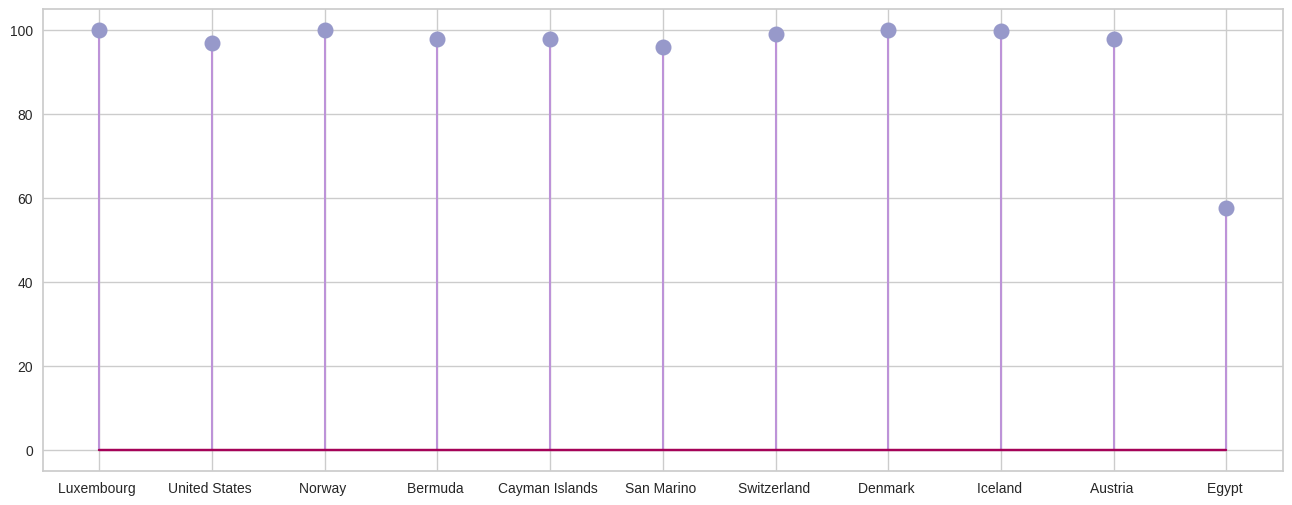

In [ ]:
plt.figure(figsize=(16, 6))
# group_by_Lit.plot(kind = 'barh', color = '#3587A4')
plt.xticks(range(len(group_by_Lit.index)), group_by_Lit.index.to_list())
(markers, stemlines, baseline) = plt.stem(group_by_Lit['Literacy (%)'])
plt.setp(stemlines, linestyle="-", color="#BD93D8", linewidth=1.5 )
plt.setp(markers, markersize=10, color="#9799CA", markeredgewidth=1.5)

In [ ]:
df.groupby('Country').sum().sort_values('GDP ($ per capita)', ascending = False).head(10)[['Population', 'Net migration']]

Population  Net migration
Country                                    
Luxembourg          474413.0           8.97
United States    298444215.0           3.41
Norway             4610820.0           1.74
Bermuda              65773.0           2.49
Cayman Islands       45436.0          18.75
San Marino           29251.0          10.98
Switzerland        7523934.0           4.05
Denmark            5450661.0           2.48
Iceland             299388.0           2.38
Austria            8192880.0           2.00

In [ ]:
group_by_Mig = df.groupby('Country').sum().sort_values('GDP ($ per capita)', ascending = False).head(10)[['Net migration']]
# Mig :  Migration

In [ ]:
Egy_M= df[df['Country Code'] =='EGY'].groupby('Country').sum().sort_values('GDP ($ per capita)', ascending = False)[[ 'Net migration']]

In [ ]:
group_by_Mig = pd.concat([group_by_Mig,Egy_M])
group_by_Mig

Net migration
Country                       
Luxembourg                8.97
United States             3.41
Norway                    1.74
Bermuda                   2.49
Cayman Islands           18.75
San Marino               10.98
Switzerland               4.05
Denmark                   2.48
Iceland                   2.38
Austria                   2.00
Egypt                    -0.22

[None, None, None]

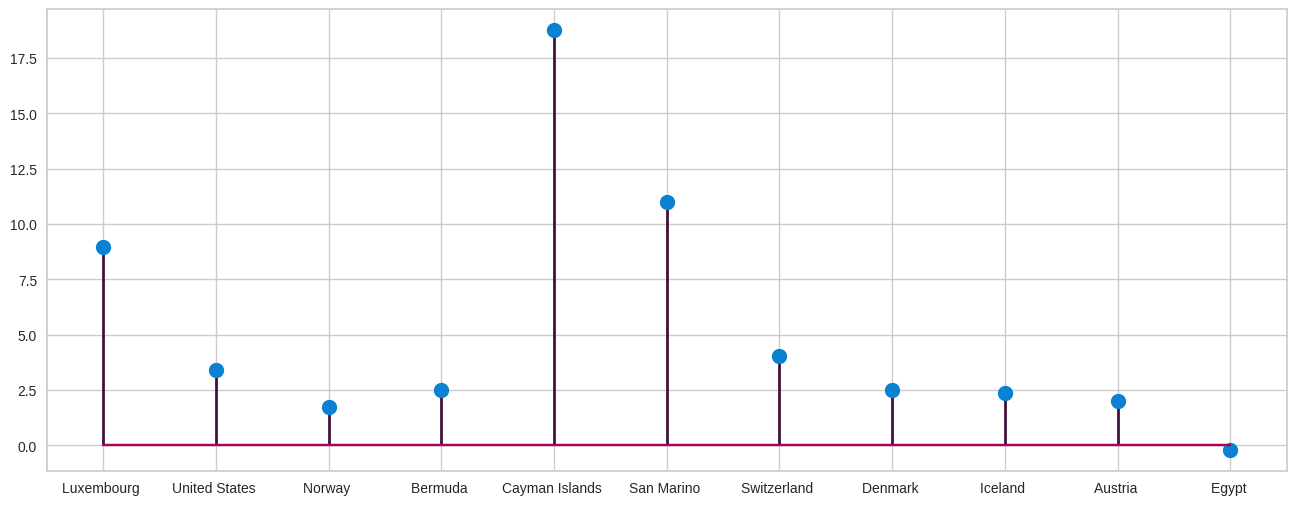

In [ ]:
plt.figure(figsize=(16, 6))
plt.xticks(range(len(group_by_Mig.index)), group_by_Mig.index.to_list())
(markers, stemlines, baseline) = plt.stem(group_by_Mig[ 'Net migration'])
plt.setp(stemlines, linestyle="-", color="#42113C", linewidth=2 )
plt.setp(markers, markersize=10, color="#0A81D1", markeredgewidth=1)

In [ ]:
#keep countries only common between the 2 datsets
common_country_codes = set(time["Country Code"]).intersection(df["Country Code"])
time = time[time["Country Code"].isin(common_country_codes)]
time.shape

(210, 64)

In [ ]:
#creating dataframe with only egypt and it will be the targeted one
EGY_time =time[time['Country Code']=='EGY'].drop('Country Name',axis=1).set_index('Country Code').iloc[:,5:].T

EGY_time.head()

Country Code         EGY
1965          160.574737
1966          166.956112
1967          172.963857
1968          178.657108
1969          191.918574

In [ ]:
#making the years the dataframe index
time_T =time.T
time_T.head(10)

0            2       4        5        6    \
Country Name  Aruba  Afghanistan  Angola  Albania  Andorra   
Country Code    ABW          AFG     AGO      ALB      AND   
1960            NaN    62.369375     NaN      NaN      NaN   
1961            NaN    62.443703     NaN      NaN      NaN   
1962            NaN    60.950364     NaN      NaN      NaN   
1963            NaN    82.021738     NaN      NaN      NaN   
1964            NaN    85.511073     NaN      NaN      NaN   
1965            NaN   105.243196     NaN      NaN      NaN   
1966            NaN   143.103233     NaN      NaN      NaN   
1967            NaN   167.165675     NaN      NaN      NaN   

                               8            9        10              11   \
Country Name  United Arab Emirates    Argentina  Armenia  American Samoa   
Country Code                   ARE          ARG      ARM             ASM   
1960                           NaN          NaN      NaN             NaN   
1961                           NaN          NaN      NaN             NaN   
1962                           NaN  1163.186836      NaN             NaN   
1963                           NaN   855.275656      NaN             NaN   
1964                           NaN  1179.504098      NaN             NaN   
1965                           NaN  1285.260799      NaN             NaN   
1966                           NaN  1277.968419      NaN             NaN   
1967                           NaN   1065.89852      NaN             NaN   

                              12   ...            254                     255  \
Country Name  Antigua and Barbuda  ...  Venezuela, RB  British Virgin Islands   
Country Code                  ATG  ...            VEN                     VGB   
1960                          NaN  ...     953.677944                     NaN   
1961                          NaN  ...     968.767091                     NaN   
1962                          NaN  ...    1022.034029                     NaN   
1963                          NaN  ...    1076.532443                     NaN   
1964                          NaN  ...     864.265327                     NaN   
1965                          NaN  ...     869.906867                     NaN   
1966                          NaN  ...     877.196049                     NaN   
1967                          NaN  ...     894.683818                     NaN   

                                256      257      258    260          262  \
Country Name  Virgin Islands (U.S.)  Vietnam  Vanuatu  Samoa  Yemen, Rep.   
Country Code                    VIR      VNM      VUT    WSM          YEM   
1960                            NaN      NaN      NaN    NaN          NaN   
1961                            NaN      NaN      NaN    NaN          NaN   
1962                            NaN      NaN      NaN    NaN          NaN   
1963                            NaN      NaN      NaN    NaN          NaN   
1964                            NaN      NaN      NaN    NaN          NaN   
1965                            NaN      NaN      NaN    NaN          NaN   
1966                            NaN      NaN      NaN    NaN          NaN   
1967                            NaN      NaN      NaN    NaN          NaN   

                       263         264         265  
Country Name  South Africa      Zambia    Zimbabwe  
Country Code           ZAF         ZMB         ZWE  
1960            529.561923  228.567398  276.643363  
1961            543.042224  216.274674  279.332656  
1962            560.699395  208.562685  275.966139  
1963            601.599951  209.453362  277.532515  
1964            642.688431  236.941713  282.376856  
1965            681.131112  296.022427  294.893605  
1966            718.118179  334.672528  279.337779  
1967            775.152812  350.653425  295.056449  

[10 rows x 210 columns]

In [ ]:
time =time.drop(time.iloc[:,2:37], axis=1)
time

Country Name Country Code          1995          1996          1997  \
0           Aruba          ABW  17140.433370  17375.225310  18713.425390   
2     Afghanistan          AFG           NaN           NaN           NaN   
4          Angola          AGO    398.120223    523.274940    514.309887   
5         Albania          ALB    750.604449   1009.977275    717.380048   
6         Andorra          AND  18731.550200  19080.321080  18252.330980   
..            ...          ...           ...           ...           ...   
260         Samoa          WSM   1285.667010   1414.208183   1598.917862   
262   Yemen, Rep.          YEM    264.466191    348.234729    399.712718   
263  South Africa          ZAF   3904.308092   3654.969254   3731.400789   
264        Zambia          ZMB    438.393360    404.090461    471.171404   
265      Zimbabwe          ZWE    646.829560    765.165124    750.683909   

             1998          1999          2000          2001          2002  \
0    19742.316740  19833.826750  21023.157510  20913.299500  21377.095190   
2             NaN           NaN           NaN           NaN    183.532775   
4      423.393453    387.689415    556.884244    527.463202    872.657772   
5      813.789397   1033.242532   1126.683340   1281.659826   1425.124219   
6    18591.912340  18884.720210  21620.485020  22809.291870  24783.836500   
..            ...           ...           ...           ...           ...   
260   1493.924235   1401.726669   1406.765683   1435.345181   1509.905288   
262    359.217055    421.821226    518.148673    515.139982    543.960981   
263   3336.429991   3267.930610   3241.674475   2867.466168   2708.435410   
264    377.456332    353.833049    364.031294    401.736210    399.098624   
265    554.361484    585.331799    565.284390    569.003209    529.186883   

     ...          2012          2013          2014          2015  \
0    ...  25609.955720  26515.678080  26942.307980  28421.386490   
2    ...    663.141053    651.987862    628.146804    592.476537   
4    ...   4962.552072   5101.983876   5059.080441   3100.830685   
5    ...   4247.630047   4413.062005   4578.633208   3952.802538   
6    ...  44904.580040  44750.435680  45682.246230  38885.376010   
..   ...           ...           ...           ...           ...   
260  ...   3902.391701   3989.860174   3948.801128   4048.513876   
262  ...   1349.990295   1497.747941   1557.601406   1488.416482   
263  ...   8173.869138   7441.230854   6965.137897   6204.929901   
264  ...   1729.647471   1840.320553   1724.576220   1307.909649   
265  ...   1290.193956   1408.367810   1407.034293   1410.329174   

             2016          2017          2018          2019          2020  \
0    28451.273740  29326.708060  30220.594520  31650.760540  24487.863560   
2      520.252064    530.149831    502.056771    500.522664    516.866552   
4     1709.515534   2283.214233   2487.500996   2142.238757   1603.993477   
5     4124.055390   4531.019374   5287.663694   5396.215864   5332.160475   
6    39932.164490  40632.484390  42903.443580  41327.502030  37207.493860   
..            ...           ...           ...           ...           ...   
260   4105.834468   4261.653789   4188.988532   4308.272753   4042.751224   
262   1069.817122    893.716573    701.714878           NaN           NaN   
263   5735.066787   6734.475153   7048.522211   6688.787271   5741.643129   
264   1249.923143   1495.752138   1475.204538   1268.120941    956.831364   
265   1421.787789   1192.107012   2269.177012   1421.868596   1372.696674   

             2021  
0    29342.100860  
2      368.754614  
4     1953.533757  
5     6492.872012  
6    42137.327270  
..            ...  
260   3857.318464  
262           NaN  
263   7055.044776  
264   1137.343633  
265   1773.920411  

[210 rows x 29 columns]

In [ ]:
time.columns

Index(['Country Name', 'Country Code', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021'],
      dtype='object')

In [ ]:
time.isnull().sum()

Country Name     0
Country Code     0
1995            18
1996            18
1997            18
1998            17
1999            16
2000            13
2001            11
2002             6
2003             6
2004             6
2005             6
2006             5
2007             5
2008             5
2009             5
2010             4
2011             4
2012             5
2013             4
2014             4
2015             5
2016             5
2017             5
2018             5
2019             6
2020             9
2021            16
dtype: int64

In [ ]:
time[time['1995'].isnull()==True]

Country Name Country Code  1995  1996  1997         1998  \
2                  Afghanistan          AFG   NaN   NaN   NaN          NaN   
11              American Samoa          ASM   NaN   NaN   NaN          NaN   
52              Cayman Islands          CYM   NaN   NaN   NaN          NaN   
78               Faroe Islands          FRO   NaN   NaN   NaN  24623.84234   
84                   Gibraltar          GIB   NaN   NaN   NaN          NaN   
93                        Guam          GUM   NaN   NaN   NaN          NaN   
131                    Liberia          LBR   NaN   NaN   NaN          NaN   
164   Northern Mariana Islands          MNP   NaN   NaN   NaN          NaN   
179                      Nauru          NRU   NaN   NaN   NaN          NaN   
188                      Palau          PLW   NaN   NaN   NaN          NaN   
193  Korea, Dem. People's Rep.          PRK   NaN   NaN   NaN          NaN   
212                 San Marino          SMR   NaN   NaN   NaN          NaN   
213                    Somalia          SOM   NaN   NaN   NaN          NaN   
219      Sao Tome and Principe          STP   NaN   NaN   NaN          NaN   
228   Turks and Caicos Islands          TCA   NaN   NaN   NaN          NaN   
237                Timor-Leste          TLS   NaN   NaN   NaN          NaN   
255     British Virgin Islands          VGB   NaN   NaN   NaN          NaN   
256      Virgin Islands (U.S.)          VIR   NaN   NaN   NaN          NaN   

            1999          2000          2001          2002  ...          2012  \
2            NaN           NaN           NaN    183.532775  ...    663.141053   
11           NaN           NaN           NaN   8800.728810  ...  11920.061090   
52           NaN           NaN           NaN           NaN  ...  75468.853440   
78   24947.26663  23370.900990  25089.643900  27238.073840  ...  50156.850970   
84           NaN           NaN           NaN           NaN  ...           NaN   
93           NaN           NaN           NaN  20878.059580  ...  31642.146260   
131          NaN    301.876470    303.858806    302.881887  ...    644.455577   
164          NaN           NaN           NaN  16640.315180  ...  14247.789300   
179          NaN           NaN           NaN           NaN  ...   9280.658894   
188          NaN   7416.480787   7913.450676   8220.487633  ...  11835.383930   
193          NaN           NaN           NaN           NaN  ...           NaN   
212  42004.94840  37473.786980  39415.162940  41770.146620  ...  48435.942530   
213          NaN           NaN           NaN           NaN  ...           NaN   
219          NaN           NaN    519.296112    568.411237  ...   1319.900833   
228          NaN           NaN  18323.873740  17803.082820  ...  22666.406910   
237          NaN    417.924200    534.650577    516.146177  ...   1019.964868   
255          NaN           NaN           NaN           NaN  ...           NaN   
256          NaN           NaN           NaN  30062.022510  ...  37795.319260   

             2013          2014          2015          2016          2017  \
2      651.987862    628.146804    592.476537    520.252064    530.149831   
11   12038.871590  12313.997360  13101.541820  13300.824610  12372.884780   
52   75688.082150  76613.406550  77298.628060  78861.119270  81258.037760   
78   55560.251740  60125.772120  52726.742240  56834.068510  59328.174770   
84            NaN           NaN           NaN           NaN           NaN   
93   32318.890900  33483.941440  34522.377930  35052.807910  35663.025040   
131    717.635753    713.734882    699.662947    722.131227    706.892692   
164  14806.006790  16044.430730  17665.100750  24054.915610  30751.641070   
179   9210.009692   9566.212540   7736.223636   8719.366526   9361.383343   
188  12418.826170  13580.006740  15761.363380  16743.376740  16011.661150   
193           NaN           NaN           NaN           NaN           NaN   
212  50438.390020  50135.484580  42281.643470  43399.458300  44885.7971

In [ ]:
time_TC=time_T.copy()

In [ ]:
col_name =time_T.loc['Country Code'].to_dict()
code= time_TC.loc['Country Code']
country =time_TC.loc['Country Name']
time_TC =time_TC.rename(columns= col_name).drop(time_TC.index[0]).drop('Country Code').fillna(method='bfill').fillna(method='ffill')

In [ ]:
time_TC.head()

ABW        AFG         AGO         ALB          AND  \
1960  6283.001443  62.369375  711.941169  639.484736  3958.671001   
1961  6283.001443  62.443703  711.941169  639.484736  3958.671001   
1962  6283.001443  60.950364  711.941169  639.484736  3958.671001   
1963  6283.001443  82.021738  711.941169  639.484736  3958.671001   
1964  6283.001443  85.511073  711.941169  639.484736  3958.671001   

              ARE          ARG         ARM         ASM          ATG  ...  \
1960  27090.23748  1163.186836  634.560413  8800.72881  1208.677164  ...   
1961  27090.23748  1163.186836  634.560413  8800.72881  1208.677164  ...   
1962  27090.23748  1163.186836  634.560413  8800.72881  1208.677164  ...   
1963  27090.23748   855.275656  634.560413  8800.72881  1208.677164  ...   
1964  27090.23748  1179.504098  634.560413  8800.72881  1208.677164  ...   

              VEN  VGB          VIR        VNM         VUT         WSM  \
1960   953.677944  NaN  30062.02251  235.65254  1033.94052  726.378354   
1961   968.767091  NaN  30062.02251  235.65254  1033.94052  726.378354   
1962  1022.034029  NaN  30062.02251  235.65254  1033.94052  726.378354   
1963  1076.532443  NaN  30062.02251  235.65254  1033.94052  726.378354   
1964   864.265327  NaN  30062.02251  235.65254  1033.94052  726.378354   

             YEM         ZAF         ZMB         ZWE  
1960  422.210702  529.561923  228.567398  276.643363  
1961  422.210702  543.042224  216.274674  279.332656  
1962  422.210702  560.699395  208.562685  275.966139  
1963  422.210702  601.599951  209.453362  277.532515  
1964  422.210702  642.688431  236.941713  282.376856  

[5 rows x 210 columns]

In [ ]:
time_TC.isnull().sum().sort_values(ascending =False)

PRK    62
VGB    62
GIB    62
ABW     0
NRU     0
       ..
GRC     0
GRD     0
GRL     0
GTM     0
ZWE     0
Length: 210, dtype: int64

In [ ]:
time_TC =time_TC.dropna(axis=1)

In [ ]:
time_TC['Global'] = time_TC.mean(axis=1)

In [ ]:
top5 = df.groupby('Country Code').sum()[['GDP ($ per capita)']].sort_values('GDP ($ per capita)', ascending= False).head(5)

In [ ]:
top5

GDP ($ per capita)
Country Code                    
LUX                      55100.0
NOR                      37800.0
USA                      37800.0
BMU                      36000.0
CYM                      35000.0

In [ ]:
time_T.columns = time_T.loc['Country Code']

# Then, drop the 'Country Code' row
time_T = time_T.drop(['Country Code', 'Country Name'])

# Now, your columns are renamed based on the 'Country Code' row
time_T.head()

Country Code  ABW        AFG  AGO  ALB  AND  ARE          ARG  ARM  ASM  ATG  \
1960          NaN  62.369375  NaN  NaN  NaN  NaN          NaN  NaN  NaN  NaN   
1961          NaN  62.443703  NaN  NaN  NaN  NaN          NaN  NaN  NaN  NaN   
1962          NaN  60.950364  NaN  NaN  NaN  NaN  1163.186836  NaN  NaN  NaN   
1963          NaN  82.021738  NaN  NaN  NaN  NaN   855.275656  NaN  NaN  NaN   
1964          NaN  85.511073  NaN  NaN  NaN  NaN  1179.504098  NaN  NaN  NaN   

Country Code  ...          VEN  VGB  VIR  VNM  VUT  WSM  YEM         ZAF  \
1960          ...   953.677944  NaN  NaN  NaN  NaN  NaN  NaN  529.561923   
1961          ...   968.767091  NaN  NaN  NaN  NaN  NaN  NaN  543.042224   
1962          ...  1022.034029  NaN  NaN  NaN  NaN  NaN  NaN  560.699395   
1963          ...  1076.532443  NaN  NaN  NaN  NaN  NaN  NaN  601.599951   
1964          ...   864.265327  NaN  NaN  NaN  NaN  NaN  NaN  642.688431   

Country Code         ZMB         ZWE  
1960          228.567398  276.643363  
1961          216.274674  279.332656  
1962          208.562685  275.966139  
1963          209.453362  277.532515  
1964          236.941713  282.376856  

[5 rows x 210 columns]

In [ ]:
time_top5 =time_T.loc[:, time_T.columns.isin(top5.index)]

In [ ]:
time_top5.head()

Country Code          BMU  CYM          LUX          NOR          USA
1960          1902.402119  NaN  2242.015817   1441.75566  3007.123445
1961          1961.538169  NaN  2222.366366  1560.324931  3066.562869
1962          2020.385965  NaN  2311.798849   1667.24743  3243.843078
1963          2020.265247  NaN  2441.038555  1775.582655  3374.515171
1964          2199.727007  NaN  2755.633117  1937.884614  3573.941185

In [ ]:
time_top5 = time_top5.loc[time_top5.index >= '1965']
time_top5

Country Code          BMU          CYM          LUX          NOR          USA
1965          2282.216546          NaN  2780.092719  2164.468823   3827.52711
1966          2630.850466          NaN  2900.433218  2317.194884  4146.316646
1967          2982.749704          NaN  2909.660629  2514.043772  4336.426587
1968          2830.188679          NaN  3175.367369  2662.117492   4695.92339
1969          3053.703704          NaN  3658.900683  2875.235844  5032.144743
1970          3387.272727          NaN  4298.033897  3306.219476  5234.296666
1971          3866.300366          NaN  4435.398008  3736.348737    5609.3826
1972          4343.173432          NaN  5486.720628  4413.575692   6094.01799
1973           5009.29368          NaN  7447.213018  5689.588807  6726.358956
1974          5853.932584          NaN  8966.728959  6811.527337   7225.69136
1975          6509.433962          NaN  8701.304731  8204.451512  7801.456664
1976          7261.278195          NaN  9490.690312  8927.201627  8592.253537
1977          8370.786517          NaN  10486.33579  10266.12067  9452.576519
1978          8876.865672          NaN  13034.38821  11462.64159  10564.94822
1979            9613.3829          NaN  15204.33082  13046.53722  11674.18187
1980          11218.21782          NaN   16531.1149  15772.24091  12574.79151
1981          13425.97697          NaN  13837.12998   15512.5067  13976.10539
1982          14166.17129          NaN   12590.9768  15224.89391  14433.78773
1983          15902.02038          NaN  12374.03042  14927.51748  15543.89372
1984          17469.82557          NaN   12126.9392  14989.48577  17121.22548
1985          18269.53552          NaN  12481.96584  15753.55277  18236.82773
1986          20450.66453          NaN  18149.86925   18883.2658  19071.22719
1987          22411.79567          NaN  22443.43146  22505.89771   20038.9411
1988          24253.17552          NaN  25219.35428  24207.28147  21417.01193
1989          25517.92172          NaN  26618.06958  24281.09614  22857.15443
1990          26841.51974          NaN  33465.47821  28242.94374  23888.60001
1991          27700.31006          NaN   35747.3378    28596.933   24342.2589
1992          28669.68171          NaN  39570.86157  30523.98506  25418.99078
1993          30900.69428          NaN  40066.72425  27963.66522  26387.29373
1994          31476.06372          NaN  43933.23544  29315.84191  27694.85342
1995          33989.72316          NaN  51032.34964  34875.70433   28690.8757
1996          44826.78907          NaN  50444.35912   37321.9742  29967.71272
1997          48478.88325          NaN  46641.64088   36629.0309  31459.13898
1998          51371.74081          NaN  47445.38108  34788.35985  32853.67695
1999          54245.45974          NaN  50872.44927  36371.05095  34515.39023
2000          56284.16865          NaN  48659.59888  38131.46061  36329.95607
2001          58883.95943          NaN  48440.14202   38542.7151  37133.62311
2002           62583.1002          NaN  53005.73392  43084.47247  37997.75966
2003          66111.72523          NaN  65689.32145  50134.89077  39490.27496
2004          70359.31911          NaN  76544.91709  57603.83602  41724.63163
2005          75882.03386          NaN  80988.13762  66810.47852  44123.40707
2006          95221.85887   87187.6509  90788.80049  74148.32008  46302.00088
2007          104287.3875  89963.92244  107475.3203  85139.96045  48050.22378
2008          106935.4863  89707.45309  120422.1379  96944.09561  48570.04598
2009           101407.764  81401.25308   109419.747  79977.69708  47194.94335
2010          101875.2841  76875.96182  110885.9914  87693.79007  48650.64313
2011          97774.16207  75438.33001  119025.0572  100600.5624   50065.9665
2012          98431.86518  75468.85344  112584.6763  101524.1419  51784.41857
2013           99471.6389  75688.08215  120000.1407  102913.4508  53291.12769
2014          98467.68399  76613.40655  123678.7021  97019.18275  55123.84979
2015          102005.6

In [ ]:
time_TC_filtered = time_TC[time_TC.index >= '1965']

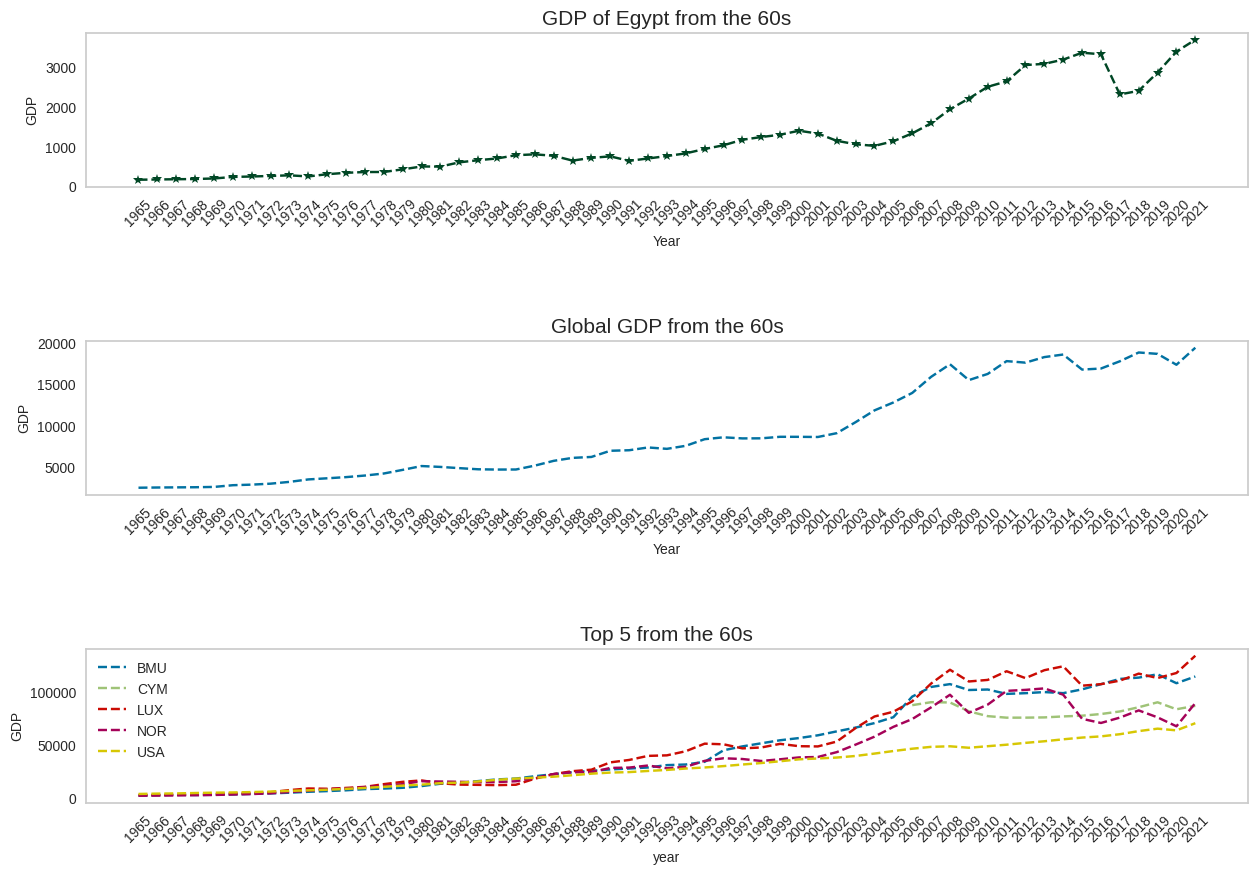

In [ ]:
fig, axs = plt.subplots(3, 1, figsize=(15, 10))
plt.subplots_adjust(hspace=1)

axs[0].set_title ('GDP of Egypt from the 60s',size=15)
axs[0].set_xlabel('Year',size=10)
axs[0].set_ylabel('GDP',size=10)
axs[0].set_xticklabels(EGY_time.index, rotation=45)
axs[0].plot(EGY_time.index,EGY_time,linestyle='dashed',marker='*', color='#004725')
axs[0].grid()

axs[1].set_title('Global GDP from the 60s', size=15)
axs[1].set_xlabel('Year', size=10)
axs[1].set_ylabel('GDP', size=10)
axs[1].set_xticklabels(time_TC_filtered.index, rotation=45)
axs[1].plot(time_TC_filtered.index, time_TC_filtered['Global'], linestyle='dashed', marker='x')
axs[1].grid()

axs[2].set_title('Top 5 from the 60s', size=15)
axs[2].set_xlabel('year', size=10)
axs[2].set_ylabel('GDP', size=10)
# axs[2].plot(time_top5.index, time_top5, color='skyblue')
axs[2].set_xticklabels(time_top5.index, rotation=45)
axs[2].grid()

for column in time_top5.columns:
    axs[2].plot(time_top5.index, time_top5[column], linestyle='dashed', marker='x', label =column)
axs[2].legend()

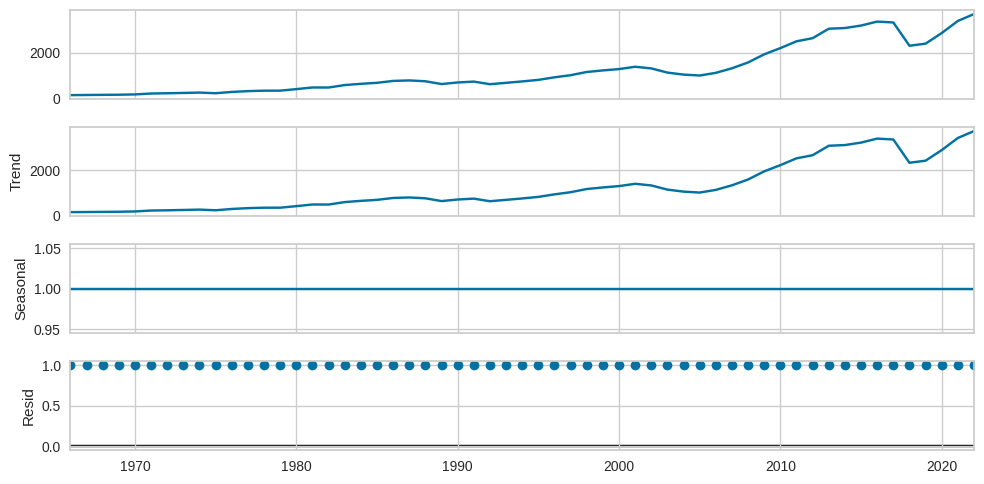

In [ ]:
#multiplicative model
date_index = pd.date_range(start=str(EGY_time.index.min()), periods=len(EGY_time), freq='Y')
EGY_time.index = date_index
multiplicative_decomposition = seasonal_decompose(EGY_time, model='multiplicative')

plt.rcParams.update({'figure.figsize': (10, 5)})
multiplicative_decomposition.plot()
plt.show()


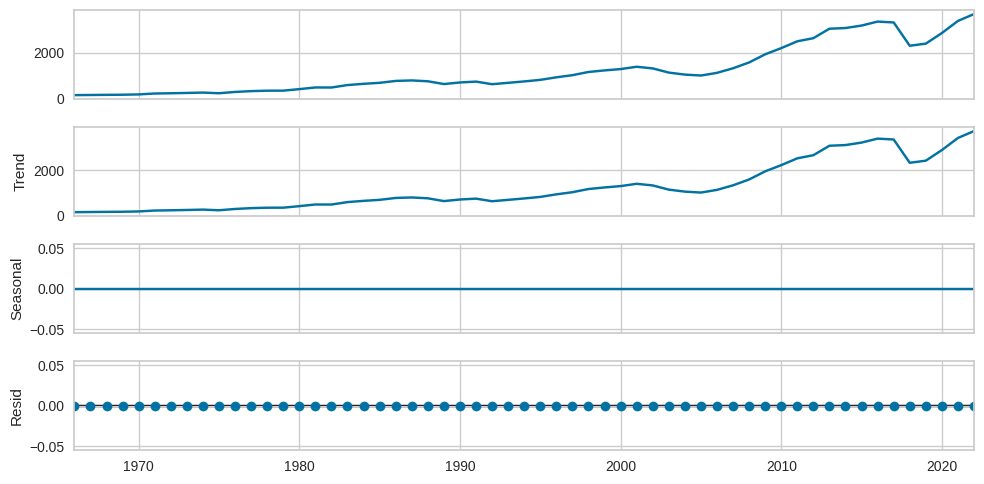

In [ ]:
EGY_time.index = date_index
multiplicative_decomposition = seasonal_decompose(EGY_time, model='additive')

plt.rcParams.update({'figure.figsize': (10, 5)})
multiplicative_decomposition.plot()
plt.show()

In [ ]:
def test_stationarity(timeseries):

    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=6).mean()
    movingSTD = timeseries.rolling(window=6).std()

    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)


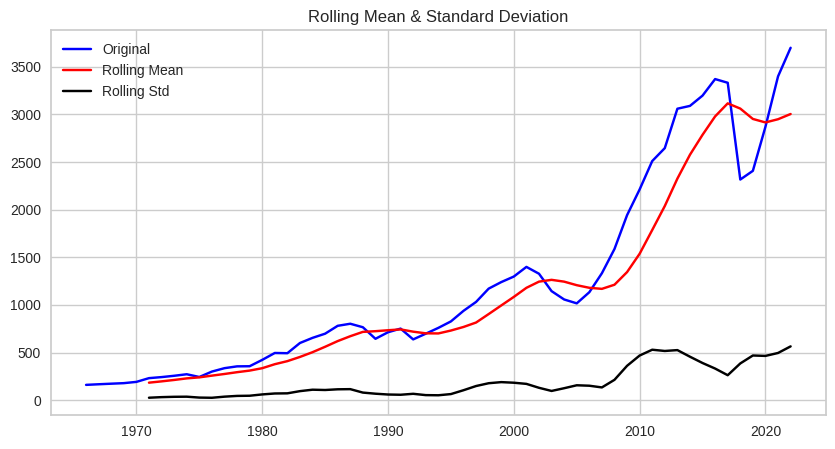

Results of Dickey Fuller Test:
Test Statistic                  4.464078
p-value                         1.000000
Lags Used                      11.000000
Number of Observations Used    45.000000
Critical Value (1%)            -3.584829
Critical Value (5%)            -2.928299
Critical Value (10%)           -2.602344
dtype: float64


In [ ]:
test_stationarity(EGY_time)

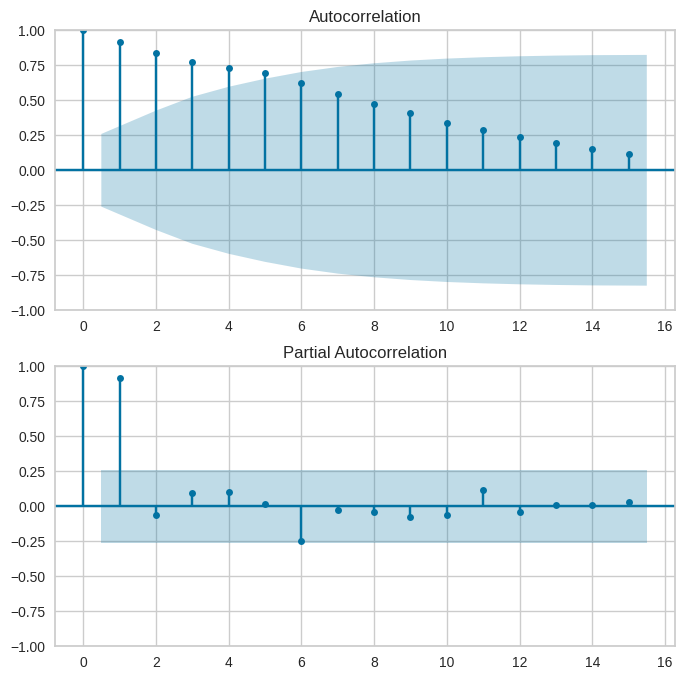

In [ ]:
fig = plt.figure(figsize=  (8,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(EGY_time , lags = 15 , ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(EGY_time, lags = 15 , ax=ax2)

In [ ]:
gdp_growth = EGY_time['EGY'].pct_change() * 100  # Multiply by 100 for percentage
gdp_growth_df = pd.DataFrame({'Economic Growth': gdp_growth})
gdp_growth_df

Economic Growth
1965-12-31              NaN
1966-12-31         3.974084
1967-12-31         3.598398
1968-12-31         3.291584
1969-12-31         7.422859
1970-12-31        20.476824
1971-12-31         4.721044
1972-12-31         5.715090
1973-12-31         6.279584
1974-12-31       -10.561506
1975-12-31        23.292578
1976-12-31        11.953555
1977-12-31         5.672619
1978-12-31         0.381250
1979-12-31        18.651302
1980-12-31        17.183149
1981-12-31        -0.467439
1982-12-31        21.709334
1983-12-31         8.981420
1984-12-31         6.722757
1985-12-31        11.837346
1986-12-31         2.781185
1987-12-31        -4.563877
1988-12-31       -15.854910
1989-12-31        10.663327
1990-12-31         5.368469
1991-12-31       -15.081440
1992-12-31         9.379004
1993-12-31         8.757532
1994-12-31         8.946586
1995-12-31        13.405303
1996-12-31        10.020331
1997-12-31        13.506382
1998-12-31         5.854841
1999-12-31         4.697701
2000-12-31         7.805727
2001-12-31        -5.130129
2002-12-31       -13.756657
2003-12-31        -7.653360
2004-12-31        -3.849171
2005-12-31        11.498266
2006-12-31        17.583001
2007-12-31        19.074232
2008-12-31        22.403600
2009-12-31        13.920293
2010-12-31        13.450477
2011-12-31         5.412862
2012-12-31        15.630079
2013-12-31         0.972674
2014-12-31         3.495447
2015-12-31         5.427857
2016-12-31        -1.150314
2017-12-31       -30.487214
2018-12-31         3.937564
2019-12-31        19.213686
2020-12-31        18.442611
2021-12-31         8.827628

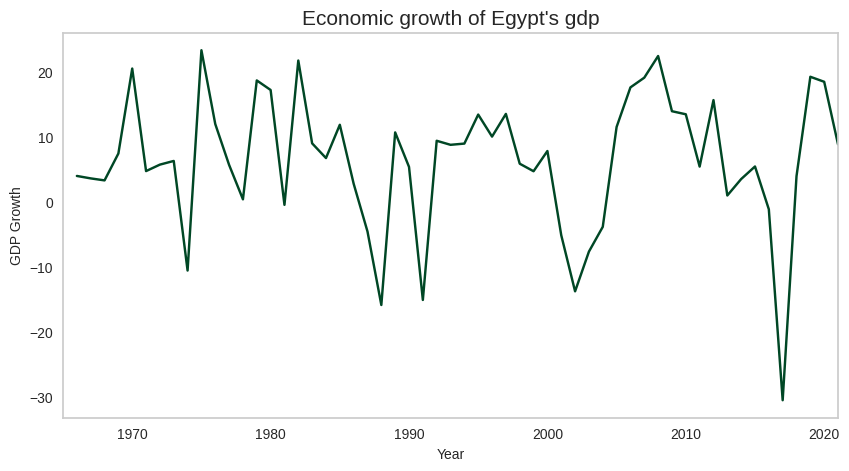

In [ ]:
plt.title ("Economic growth of Egypt's gdp",size=15)
plt.xlabel('Year',size=10)
plt.ylabel('GDP Growth',size=10)
plt.xticks(gdp_growth.index)
gdp_growth.plot( color='#004725')
plt.grid()

In [ ]:
EGY_time.shape

(57, 1)

In [ ]:
y_train = EGY_time[:45]
y_test = EGY_time[45:]

In [ ]:
model = pm.auto_arima(EGY_time, start_p=1, start_q=1,      # use adftest to find optimal 'd'
                      max_p=30, max_q=30,
                      trace=True,
                      d=1,  max_d = 15,
                      seasonal=False,
                      suppress_warnings=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=752.673, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=756.207, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=751.736, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=750.784, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=759.545, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=752.564, Time=0.36 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=749.184, Time=0.63 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=754.501, Time=0.77 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=749.055, Time=0.68 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=752.456, Time=0.42 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=750.628, Time=0.76 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.83 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=754.408, Time=0.32 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=752.471, Time=0.90 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=750.889, 

In [ ]:
model = sm.tsa.arima.ARIMA(y_train, order=(1,1,3))
fitted = model.fit(method = 'innovations_mle')

# Forecast
fc= fitted.forecast(steps=20, alpha=0.05)

In [ ]:
arima_pred = fitted.predict(start=len(y_train), end=len(EGY_time) - 1)

# Set the date index for arima_pred using the date values from the original dataset
arima_pred.index = EGY_time.index[len(y_train):]
arima_pred

2010-12-31    2427.442476
2011-12-31    2596.625261
2012-12-31    2704.475680
2013-12-31    2770.177563
2014-12-31    2810.202788
2015-12-31    2834.585936
2016-12-31    2849.440015
2017-12-31    2858.489038
2018-12-31    2864.001653
2019-12-31    2867.359908
2020-12-31    2869.405739
2021-12-31    2870.652047
Freq: A-DEC, Name: predicted_mean, dtype: float64

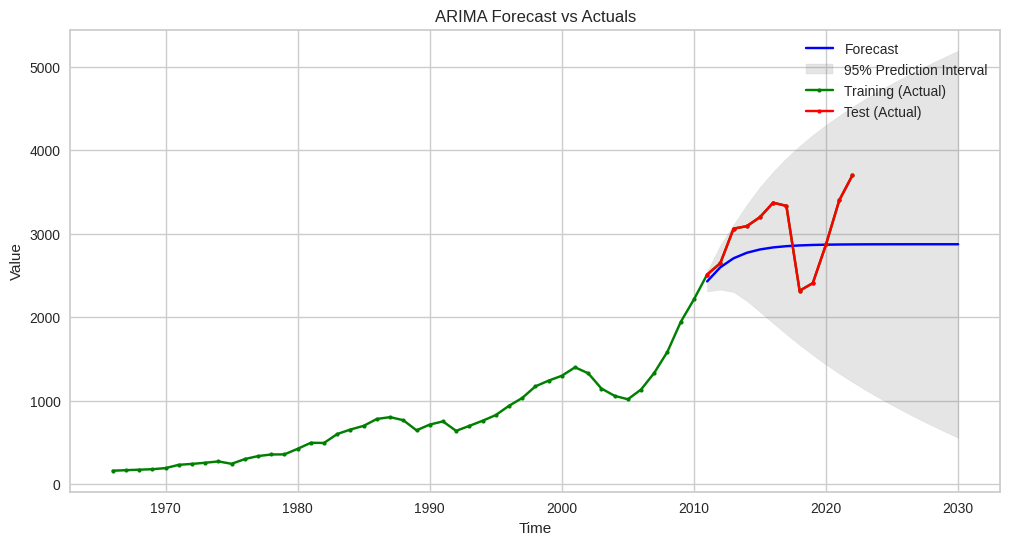

In [ ]:
# Assuming you have already fitted your ARIMA model
forecast = fitted.get_forecast(steps=20)  # Replace 10 with the number of steps you want to forecast

# Extract the forecasted values and associated confidence intervals
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot the forecasted values and confidence intervals
plt.figure(figsize=(12, 6), dpi=100)
plt.plot(forecast_mean.index, forecast_mean.values, color='blue', label='Forecast')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='gray', alpha=0.2, label='95% Prediction Interval')
plt.plot(EGY_time, label='Training (Actual)', color='green', marker='o', markersize=3)
plt.plot(y_test.index, y_test.values, label='Test (Actual)', color='red', marker='o', markersize=3)

plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.title('ARIMA Forecast vs Actuals')
plt.show()

In [ ]:
print('MAPE:',mean_absolute_percentage_error(y_test,arima_pred))
print('MAE:',mean_absolute_error(y_test,arima_pred))
print('RMSE:',mean_squared_error(y_test,arima_pred))
print('AIC:',fitted.aic)

MAPE: 0.12496947735267189
MAE: 380.71918581451587
RMSE: 197911.93664819794
AIC: 500.7593318546333


In [ ]:
df.shape

(227, 21)

Population                               Axes(0.125,0.747241;0.133621x0.132759)
Area (sq. mi.)                        Axes(0.285345,0.747241;0.133621x0.132759)
Pop. Density (per sq. mi.)             Axes(0.44569,0.747241;0.133621x0.132759)
Coastline (coast/area ratio)          Axes(0.606034,0.747241;0.133621x0.132759)
Net migration                         Axes(0.766379,0.747241;0.133621x0.132759)
Infant mortality (per 1000 births)       Axes(0.125,0.587931;0.133621x0.132759)
GDP ($ per capita)                    Axes(0.285345,0.587931;0.133621x0.132759)
Literacy (%)                           Axes(0.44569,0.587931;0.133621x0.132759)
Phones (per 1000)                     Axes(0.606034,0.587931;0.133621x0.132759)
Arable (%)                            Axes(0.766379,0.587931;0.133621x0.132759)
Crops (%)                                Axes(0.125,0.428621;0.133621x0.132759)
Other (%)                             Axes(0.285345,0.428621;0.133621x0.132759)
Climate                                A

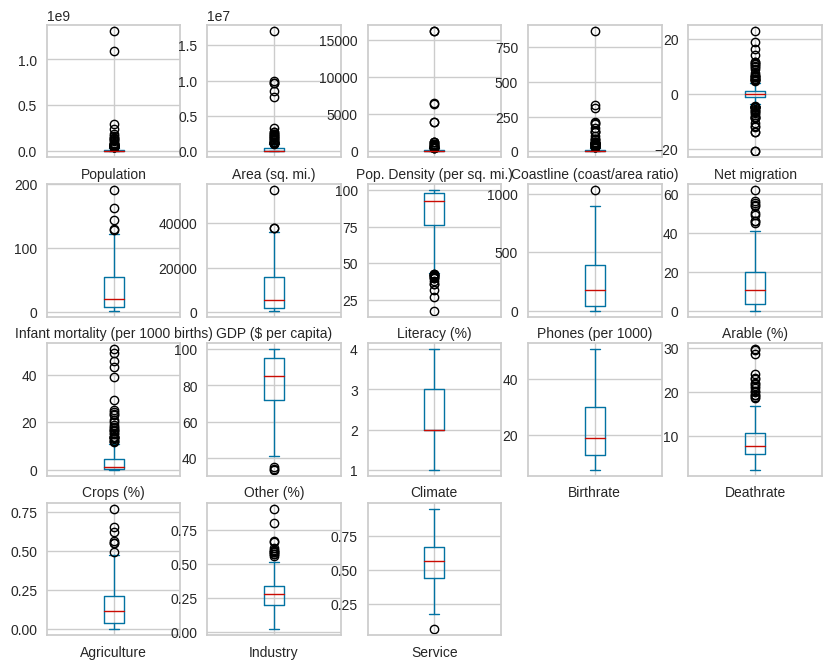

In [ ]:
df.plot(kind='box', subplots=True,figsize = (10,10) , layout = (5,5))

In [ ]:
data =df.copy()
cols = data.drop(['Country', 'Region', 'Country Code'], axis=1).columns

In [ ]:
for col in cols:
    percentiles = data[col].quantile([0.025, 0.975]).values
    data[col][data[col]<= percentiles [0]] =percentiles[0]
    data[col][data[col] >= percentiles [1]] = percentiles [1]

Population                               Axes(0.125,0.747241;0.133621x0.132759)
Area (sq. mi.)                        Axes(0.285345,0.747241;0.133621x0.132759)
Pop. Density (per sq. mi.)             Axes(0.44569,0.747241;0.133621x0.132759)
Coastline (coast/area ratio)          Axes(0.606034,0.747241;0.133621x0.132759)
Net migration                         Axes(0.766379,0.747241;0.133621x0.132759)
Infant mortality (per 1000 births)       Axes(0.125,0.587931;0.133621x0.132759)
GDP ($ per capita)                    Axes(0.285345,0.587931;0.133621x0.132759)
Literacy (%)                           Axes(0.44569,0.587931;0.133621x0.132759)
Phones (per 1000)                     Axes(0.606034,0.587931;0.133621x0.132759)
Arable (%)                            Axes(0.766379,0.587931;0.133621x0.132759)
Crops (%)                                Axes(0.125,0.428621;0.133621x0.132759)
Other (%)                             Axes(0.285345,0.428621;0.133621x0.132759)
Climate                                A

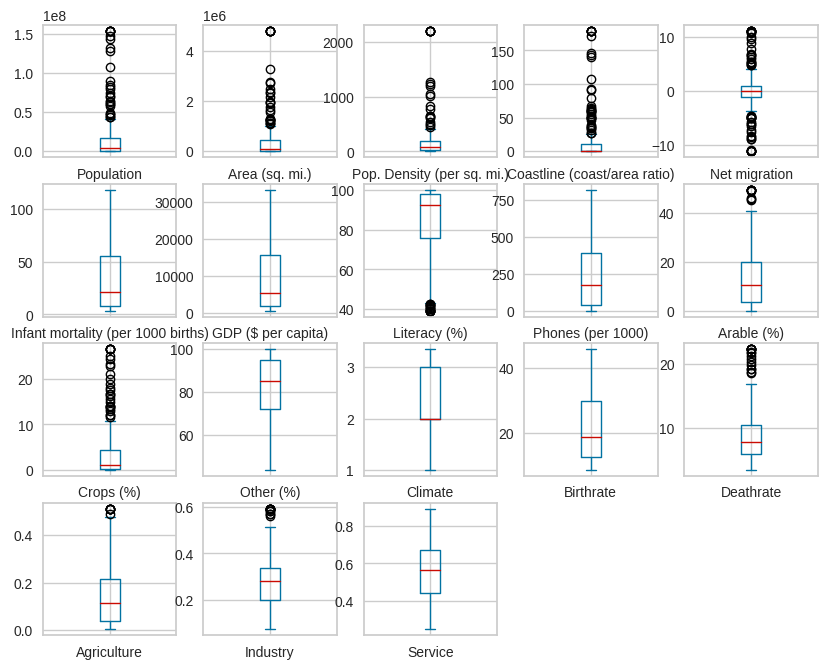

In [ ]:
data.plot(kind='box', subplots=True,figsize = (10,10) , layout = (5,5))

In [ ]:
df =df.drop(['Country','Country Code'], axis =1)

In [ ]:
le =LabelEncoder()
df['Region'] = le.fit_transform(df['Region'])

In [ ]:
x=df.drop('GDP ($ per capita)', axis=1)
y=df['GDP ($ per capita)']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=42)

In [ ]:
SC= StandardScaler()

In [ ]:
x_scaled=SC.fit_transform(x)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size=0.25, random_state=42)

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df.values, i)
                          for i in range(len(df.columns))]

vif_data

feature           VIF
0                               Region  7.707992e+00
1                           Population  1.567879e+00
2                       Area (sq. mi.)  1.565306e+00
3           Pop. Density (per sq. mi.)  1.457397e+00
4         Coastline (coast/area ratio)  1.480652e+00
5                        Net migration  1.458177e+00
6   Infant mortality (per 1000 births)  1.873935e+01
7                   GDP ($ per capita)  9.305595e+00
8                         Literacy (%)  5.731044e+01
9                    Phones (per 1000)  1.155160e+01
10                          Arable (%)  9.725723e+05
11                           Crops (%)  2.435222e+05
12                           Other (%)  1.878426e+07
13                             Climate  1.785330e+01
14                           Birthrate  3.567657e+01
15                           Deathrate  1.338601e+01
16                         Agriculture  1.171073e+06
17                            Industry  2.647010e+06
18                             Service  9.379667e+06

In [ ]:
data =df.drop(['Agriculture', 'Service', 'Other (%)', 'Arable (%)'], axis =1)

In [ ]:
data['population increase']= data['Birthrate']-data['Deathrate']
data =data.drop(['Birthrate','Deathrate'],axis=1)

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = data.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(data.values, i)
                          for i in range(len(data.columns))]

vif_data

feature        VIF
0                               Region   5.374555
1                           Population   1.415748
2                       Area (sq. mi.)   1.494674
3           Pop. Density (per sq. mi.)   1.278039
4         Coastline (coast/area ratio)   1.426177
5                        Net migration   1.437430
6   Infant mortality (per 1000 births)   4.630535
7                   GDP ($ per capita)   8.438971
8                         Literacy (%)  21.001019
9                    Phones (per 1000)   9.961971
10                           Crops (%)   1.939282
11                             Climate  13.339151
12                            Industry   5.914248
13                 population increase   5.089805

In [ ]:
data = data.drop('Climate', axis=1)

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = data.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(data.values, i)
                          for i in range(len(data.columns))]

vif_data

feature        VIF
0                               Region   5.211792
1                           Population   1.415453
2                       Area (sq. mi.)   1.481797
3           Pop. Density (per sq. mi.)   1.277835
4         Coastline (coast/area ratio)   1.403386
5                        Net migration   1.436968
6   Infant mortality (per 1000 births)   4.355277
7                   GDP ($ per capita)   8.437510
8                         Literacy (%)  13.073803
9                    Phones (per 1000)   9.761738
10                           Crops (%)   1.917117
11                            Industry   5.913938
12                 population increase   4.926871

In [ ]:
data = data.drop('Literacy (%)', axis=1)

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = data.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(data.values, i)
                          for i in range(len(data.columns))]

vif_data

feature       VIF
0                               Region  5.202426
1                           Population  1.415433
2                       Area (sq. mi.)  1.481194
3           Pop. Density (per sq. mi.)  1.277692
4         Coastline (coast/area ratio)  1.402783
5                        Net migration  1.407566
6   Infant mortality (per 1000 births)  4.325732
7                   GDP ($ per capita)  8.383271
8                    Phones (per 1000)  7.659165
9                            Crops (%)  1.838943
10                            Industry  3.792113
11                 population increase  4.574602

<Axes: >

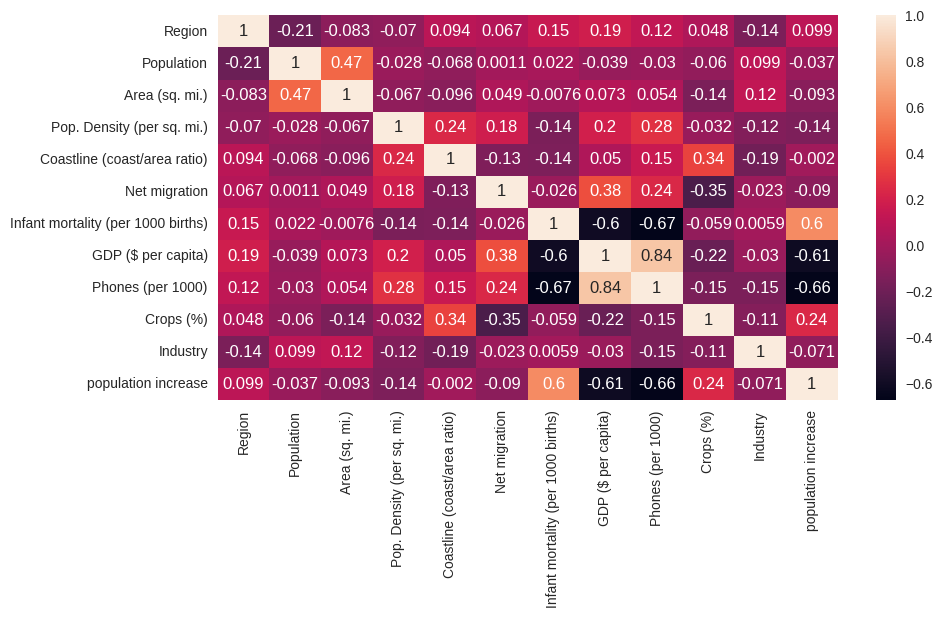

In [ ]:
sns.heatmap(data.corr(), annot=True)

In [ ]:
x_mc=data.drop('GDP ($ per capita)', axis=1)
y_mc=data['GDP ($ per capita)']
x_train_mc, x_test_mc, y_train_mc, y_test_mc = train_test_split(x_mc,y_mc,test_size=0.25, random_state=42)

In [ ]:
pca = PCA(svd_solver='randomized', random_state=42)

In [ ]:
pca.fit(x_scaled)

PCA(random_state=42, svd_solver='randomized')

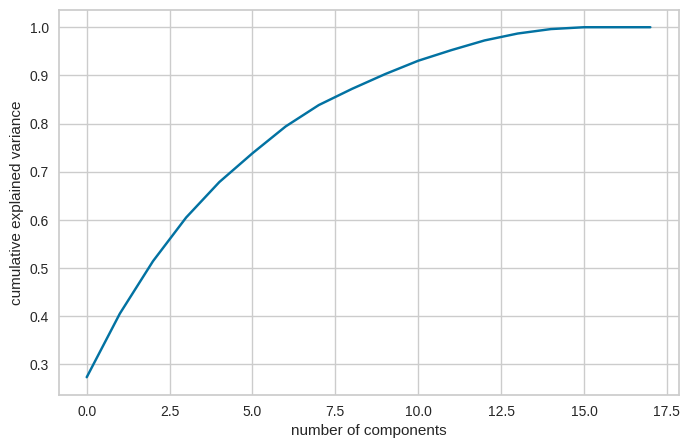

In [ ]:
%matplotlib inline
fig = plt.figure(figsize = (8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.savefig('pca_no')
plt.show()

In [ ]:
lr=LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
lr.score(x_train, y_train)

0.7854911688894195

In [ ]:
lr.score(x_test, y_test)

0.808077858151502

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
df_predict1 =pd.DataFrame({"Y_test" : y_test.values , "Y_predict": y_pred})
df_predict1.head()

Y_test     Y_predict
0   3500.0   6158.522735
1   7200.0   7132.105801
2  16900.0  13750.496851
3    800.0    201.871169
4  12500.0  11529.757879

In [ ]:
print('R2:',r2_score(y_test, y_pred))
print('MAPE:',mean_absolute_percentage_error(y_test, y_pred))

R2: 0.808077858151502
MAPE: 0.7260565693317683


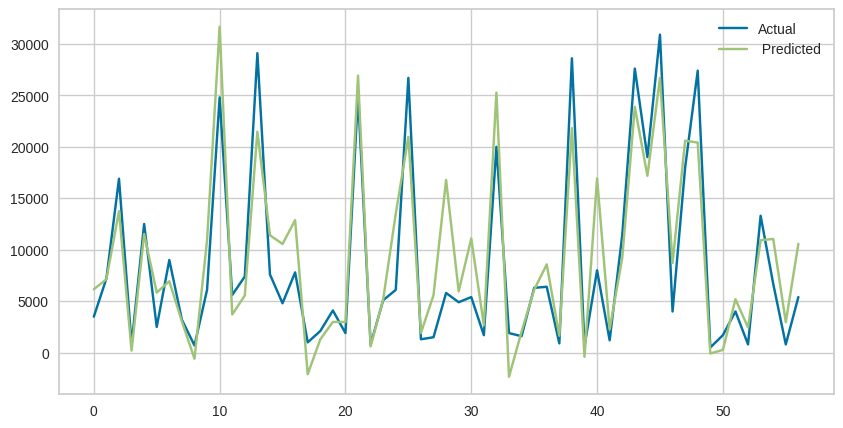

In [ ]:
plt.figure(figsize= (10,5))
plt.plot(df_predict1)
plt.legend(["Actual" , " Predicted"])

In [ ]:
lr.fit(x_train_mc, y_train_mc)

LinearRegression()

In [ ]:
lr.score(x_train_mc, y_train_mc)

0.7599505985339973

In [ ]:
lr.score(x_test_mc, y_test_mc)

0.8101567684807658

In [ ]:
y_pred_mc = lr.predict(x_test_mc)
df_predict =pd.DataFrame({"Y_test" : y_test_mc.values , "Y_predict": y_pred_mc})
df_predict.head()

Y_test     Y_predict
0   3500.0   6501.927853
1   7200.0   6766.774971
2  16900.0  12267.425146
3    800.0    821.767519
4  12500.0  15601.593890

In [ ]:
print('R2:',r2_score(y_test_mc, y_pred_mc))
print('MAPE:',mean_absolute_percentage_error(y_test_mc, y_pred_mc))

R2: 0.8101567684807658
MAPE: 0.6382027261850483


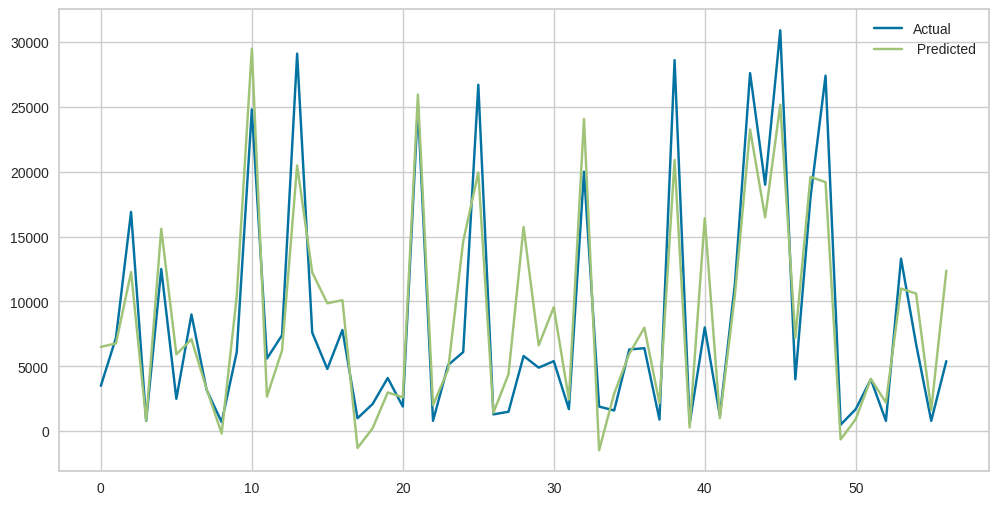

In [ ]:
plt.figure(figsize= (12,6))
plt.plot(df_predict)
plt.legend(["Actual" , " Predicted"])

In [ ]:
paramsRidge = {'alpha':[0.01, 0.1, 1,10,100], 'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

ridgeReg = GridSearchCV(Ridge(),paramsRidge, cv = 10)
ridgeReg.fit(X = x_train,y= y_train)
Rmodel = ridgeReg.best_estimator_

In [ ]:
print(ridgeReg.best_score_, ridgeReg.best_params_)

0.6487181963449854 {'alpha': 100, 'solver': 'lsqr'}


In [ ]:
ridge = Ridge(alpha=0,solver='lsqr')
rid=ridge.fit(x_train, y_train)

In [ ]:
rid.score(x_train, y_train)

0.7656022112971247

In [ ]:
rid.score(x_test, y_test)

0.8057053388373815

In [ ]:
y_pred_rid = rid.predict(x_test)
pred_rid = pd.DataFrame({"Y_test" : y_test.values , "Y_predict": y_pred_rid})
pred_rid.head(10)

Y_test     Y_predict
0   3500.0   5510.788625
1   7200.0   7235.956451
2  16900.0  13189.726399
3    800.0    851.516952
4  12500.0  14930.045258
5   2500.0   5760.533821
6   9000.0   6990.672865
7   3200.0   3218.570649
8    700.0  -1864.956144
9   6100.0  10859.332495

In [ ]:
print('R2:',r2_score(y_test,y_pred_rid))
print('MAPE:',mean_absolute_percentage_error(y_test,y_pred_rid))

R2: 0.8057053388373815
MAPE: 0.8007415519115534


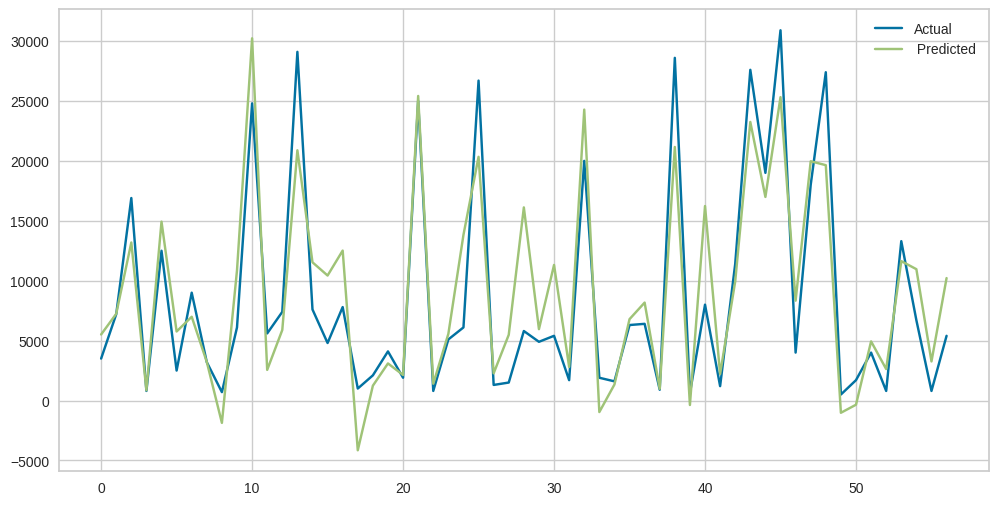

In [ ]:
plt.figure(figsize= (12,6))
plt.plot(pred_rid)
plt.legend(["Actual" , " Predicted"])

In [ ]:
paramsRidge = {'alpha':[0.01, 0.1, 1,10,100], 'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

ridgeReg2 = GridSearchCV(Ridge(),paramsRidge, cv = 10)
ridgeReg2.fit(X = x_train_mc,y= y_train_mc)
Rmodel = ridgeReg2.best_estimator_

In [ ]:
print(ridgeReg2.best_score_, ridgeReg2.best_params_)

0.5739861581180413 {'alpha': 100, 'solver': 'auto'}


In [ ]:
ridge = Ridge(alpha=100, solver= 'auto')
rid2=ridge.fit(x_train_mc, y_train_mc)

In [ ]:
rid2.score(x_train_mc, y_train_mc)

0.7561914764452508

In [ ]:
rid2.score(x_test_mc, y_test_mc)

0.803991152960491

In [ ]:
y_pred_rid2 = rid2.predict(x_test_mc)
pred_rid2 = pd.DataFrame({"Y_test" : y_test_mc.values , "Y_predict": y_pred_rid2})
pred_rid2.head(10)

Y_test     Y_predict
0   3500.0   6519.555342
1   7200.0   6716.820947
2  16900.0  11665.610207
3    800.0   1301.898855
4  12500.0  15000.117454
5   2500.0   6281.634988
6   9000.0   6120.541082
7   3200.0   2641.192387
8    700.0    631.228368
9   6100.0  10487.069718

In [ ]:
print('R2:',r2_score(y_test,y_pred_rid2))
print('MAPE:',mean_absolute_percentage_error(y_test,y_pred_rid2))

R2: 0.803991152960491
MAPE: 0.5612430080689569


In [ ]:
clf = Lasso(alpha=7, max_iter=8000)

In [ ]:
clf =clf.fit(x_train,y_train)

In [ ]:
clf.score(x_train,y_train)

0.765580530461384

In [ ]:
clf.score(x_test,y_test)

0.806442613894282

In [ ]:
y_pred_la = clf.predict(x_test)
pred_la = pd.DataFrame({"Y_test" : y_test.values , "Y_predict": y_pred_la})
pred_la.head(10)

Y_test     Y_predict
0   3500.0   5511.640390
1   7200.0   7211.641207
2  16900.0  13191.158752
3    800.0    880.381014
4  12500.0  14953.345225
5   2500.0   5754.123251
6   9000.0   6972.973770
7   3200.0   3234.322631
8    700.0  -1822.251618
9   6100.0  10817.366640

In [ ]:
print('R2:',r2_score(y_test,y_pred_la))
print('MAPE:',mean_absolute_percentage_error(y_test,y_pred_la))

R2: 0.806442613894282
MAPE: 0.7973071151755219


In [ ]:
CLF2 = Lasso(alpha=7, max_iter=8000)

In [ ]:
clf2 =CLF2.fit(x_train_mc,y_train_mc)

In [ ]:
clf2.score(x_train_mc,y_train_mc)

0.7599219275646123

In [ ]:
clf2.score(x_test_mc,y_test_mc)

0.8100724746589055

In [ ]:
y_pred_la2 = clf2.predict(x_test_mc)
pred_la2 = pd.DataFrame({"Y_test" : y_test_mc.values , "Y_predict": y_pred_la2})
pred_la2.head(10)

Y_test     Y_predict
0   3500.0   6497.038557
1   7200.0   6766.980816
2  16900.0  12214.815362
3    800.0    865.786104
4  12500.0  15558.469083
5   2500.0   5950.943539
6   9000.0   7000.633270
7   3200.0   3210.825964
8    700.0   -103.148966
9   6100.0  10420.091748

In [ ]:
print('R2:',r2_score(y_test_mc,y_pred_la2))
print('MAPE:',mean_absolute_percentage_error(y_test_mc,y_pred_la2))

R2: 0.8100724746589055
MAPE: 0.6295741057446559


In [ ]:
pram_knn = {"n_neighbors": [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,50,100,150]}
knn = KNeighborsRegressor()
grid_knn = GridSearchCV(estimator= knn , param_grid= pram_knn , cv = 10 )
knn_grid_result = grid_knn.fit(x_train, y_train)

knn_grid_result

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 50, 100,
                                         150]})

In [ ]:
print ("Best: %f using %s" %(knn_grid_result.best_score_ , knn_grid_result.best_params_))

Best: 0.641014 using {'n_neighbors': 13}


In [ ]:
model_knn = knn_grid_result.best_estimator_
model_knn

KNeighborsRegressor(n_neighbors=13)

In [ ]:
print(model_knn.score(x_train,y_train))
model_knn.score(x_test,y_test)

0.7315307925738734


0.842295955365584

In [ ]:
y_pred_knn = model_knn.predict(x_test)
pred_knn= pd.DataFrame({"Y_test" : y_test.values , "Y_predict": y_pred_knn})
pred_knn.head(10)

Y_test     Y_predict
0   3500.0   9346.153846
1   7200.0   3919.615385
2  16900.0  11084.615385
3    800.0   1507.692308
4  12500.0  10938.461538
5   2500.0   7323.076923
6   9000.0   7138.461538
7   3200.0   6753.846154
8    700.0   1192.307692
9   6100.0  11484.615385

In [ ]:
print('R2:',r2_score(y_test,y_pred_knn))
print('MAPE:',mean_absolute_percentage_error(y_test,y_pred_knn))

R2: 0.842295955365584
MAPE: 0.6626380688417403


In [ ]:
pram_knn = {"n_neighbors": [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,50]}
knn = KNeighborsRegressor()
grid_knn = GridSearchCV(estimator= knn , param_grid= pram_knn , cv = 10 )
knn_grid_result = grid_knn.fit(x_train_mc, y_train_mc)

knn_grid_result

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 50]})

In [ ]:
print ("Best: %f using %s" %(knn_grid_result.best_score_ , knn_grid_result.best_params_))

Best: -0.109353 using {'n_neighbors': 50}


In [ ]:
model_knn = knn_grid_result.best_estimator_
model_knn

KNeighborsRegressor(n_neighbors=50)

In [ ]:
print(model_knn.score(x_train_mc,y_train_mc))
model_knn.score(x_test_mc,y_test_mc)

0.017567700436627476


0.02687721640429086

In [ ]:
y_pred_knn = model_knn.predict(x_test_mc)
pred_knn= pd.DataFrame({"Y_test" : y_test_mc.values , "Y_predict": y_pred_knn})
pred_knn.head(10)

Y_test  Y_predict
0   3500.0    10642.0
1   7200.0     9589.1
2  16900.0    13013.1
3    800.0     6838.0
4  12500.0    12913.1
5   2500.0     9672.0
6   9000.0     7146.0
7   3200.0     8606.0
8    700.0     7916.0
9   6100.0     9188.0

In [ ]:
print('R2:',r2_score(y_test_mc,y_pred_knn))
print('MAPE:',mean_absolute_percentage_error(y_test_mc,y_pred_knn))

R2: 0.02687721640429086
MAPE: 2.898392389317039


In [ ]:
automl = AutoML(algorithms=["Linear", 'Baseline', 'Xgboost', 'CatBoost'],
                total_time_limit=5*60)
automl.fit(x_train_mc, y_train_mc)

AutoML directory: AutoML_1
The task is regression with evaluation metric rmse
AutoML will use algorithms: ['Linear', 'Baseline', 'Xgboost', 'CatBoost']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 2 models
1_Baseline rmse 11018.186039 trained in 0.99 seconds
2_Linear rmse 9704.259404 trained in 20.64 seconds
* Step default_algorithms will try to check up to 2 models
3_Default_Xgboost rmse 4710.508553 trained in 8.86 seconds
4_Default_CatBoost rmse 4245.642656 trained in 2.51 seconds
* Step ensemble will try to check up to 1 model
Ensemble rmse 4175.754928 trained in 0.61 seconds
AutoML fit time: 44.73 seconds
AutoML best model: Ensemble


AutoML(algorithms=['Linear', 'Baseline', 'Xgboost', 'CatBoost'],
       total_time_limit=300)

In [ ]:
print(automl.score(x_train_mc, y_train_mc))
automl.score(x_test_mc, y_test_mc)

0.9576394547171994


0.8939222994702106

In [ ]:
auto_pred = automl.predict(x_test_mc)

In [ ]:
print('R2:',r2_score(y_test_mc,auto_pred))
print('MAPE:',mean_absolute_percentage_error(y_test_mc,auto_pred))

R2: 0.8939222994702106
MAPE: 0.5506243604711609


In [ ]:
clf = setup(data, target='GDP ($ per capita)', session_id = 123)

In [ ]:
best_models = compare_models()

Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [ ]:
best_model = create_model("et")
tuned_model_mc = tune_model(best_model)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
predictions = predict_model(tuned_model_mc, data=x_test_mc)
predictions

Region   Population  Area (sq. mi.)  Pop. Density (per sq. mi.)  \
0        2    2976372.0         29800.0                   99.900002   
1        9    2044147.0        825418.0                    2.500000   
2        5     698585.0           665.0                 1050.500000   
3        9   18595468.0        587040.0                   31.700001   
4        8      82459.0           477.0                  172.899994   
5        2    4661473.0         69700.0                   66.900002   
6        0   24385858.0        329750.0                   74.000000   
7        0  245452736.0       1919440.0                  127.900002   
8        9   62660552.0       2345410.0                   26.700001   
9        3    4498976.0         51129.0                   88.000000   
10      10      91084.0           116.0                  785.200012   
11       8     176908.0          2944.0                   60.099998   
12       0   64631596.0        514000.0                  125.699997   
13      10   10379067.0         30528.0                  340.000000   
14       3    7385367.0        110910.0                   66.599998   
15       5    3874050.0         10400.0                  372.500000   
16       9      81541.0           455.0                  179.199997   
17       9    3042004.0        111370.0                   27.299999   
18       9    9690222.0        245857.0                   39.400002   
19       4   12293545.0        108890.0                  112.900002   
20       9   41236376.0       2505810.0                   16.500000   
21      10      33987.0           160.0                  212.399994   
22       9   11502010.0        752614.0                   15.300000   
23       4   28302604.0       1285220.0                   22.000000   
24       2   10293011.0        207600.0                   49.599998   
25      10   58133508.0        301230.0                  193.000000   
26       9     486530.0         23000.0                   21.200001   
27       5   26783384.0        437072.0                   61.299999   
28       9     787584.0          2517.0                  312.899994   
29       9    1136334.0         17363.0                   65.500000   
30       4     168458.0           616.0                  273.500000   
31       9    1641564.0         11300.0                  145.300003   
32      10   10688058.0        131940.0                   81.000000   
33       0  147365344.0        144000.0                 1023.400024   
34       2    5213898.0        198500.0                   26.299999   
35       4    3191319.0         78200.0                   40.799999   
36       6    5900754.0       1759540.0                    3.400000   
37       9  131859728.0        923768.0                  142.699997   
38      10   16491461.0         41526.0                  397.100006   
39       9   13013926.0        118480.0                  109.800003   
40       4     452776.0          1780.0                  254.399994   
41       9   19686504.0        801590.0                   24.600000   
42       1    3585906.0         65200.0                   55.000000   
43      10   60876136.0        547030.0                  111.300003   
44       5    2418393.0         17820.0                  135.699997   
45      10     299388.0        103000.0                    2.900000   
46       6   78887008.0       1001450.0                   78.800003   
47      10   10605870.0         92391.0                  114.800003   
48      10    5231372.0        338145.0                   15.500000   
49       9    6005250.0         71740.0                   83.699997   
50       2   27307134.0        447400.0                   61.000000   
51       6   33241260.0        446550.0                   74.400002   
52       5   21456188.0        527970.0                   40.599998   
53       3    5439448.0         48845.0                  111.400002   
54       5   70413960.0        780580.0                   90.199997   
55       8     105432.0     

In [ ]:
print(tuned_model_mc.score(x_train_mc, y_train_mc))
tuned_model_mc.score(x_test_mc, y_test_mc)

0.9580805336766626


0.9428968851674715

In [ ]:
et_pred =pd.DataFrame({"Y_test" : y_test_mc.values , "Y_predict": predictions['prediction_label']})
et_pred.head()

Y_test  Y_predict
0   3500.0     3500.0
1   7200.0     7200.0
2  16900.0    16900.0
3    800.0      800.0
4  12500.0    12500.0

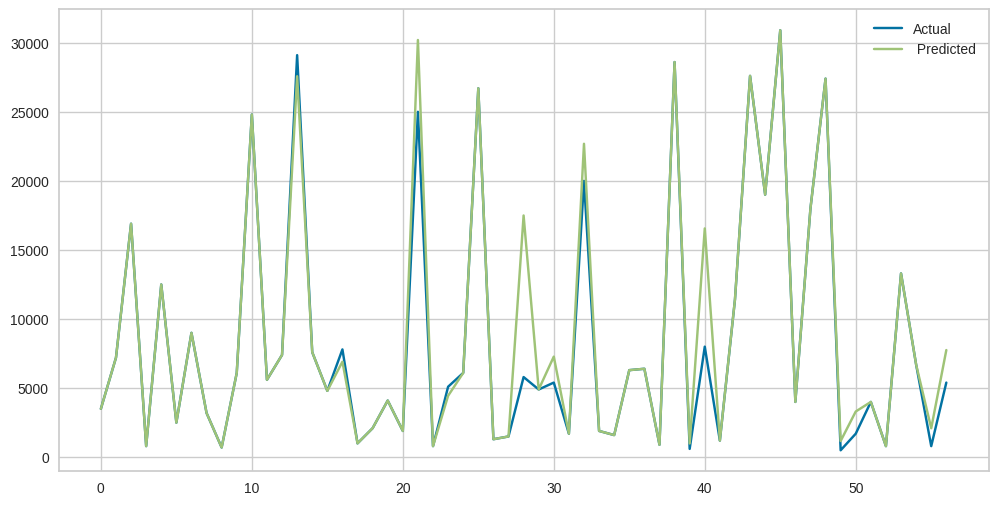

In [ ]:
plt.figure(figsize= (12,6))
plt.plot(et_pred)
plt.legend(["Actual" , " Predicted"])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
tuned_model = RandomForestClassifier(n_estimators=100, max_depth=10)  # Example parameters, replace with your tuned parameters
tuned_model.fit(x_train_mc, y_train_mc)  # Assuming X_train and y_train are your training data

feat_weight = tuned_model.feature_importances_
print(feat_weight)


[0.03573051 0.09029527 0.09655395 0.09026141 0.06977413 0.0890627
 0.12592158 0.10991025 0.07676081 0.10175163 0.11397777]


In [ ]:
feat_weight_mc = tuned_model_mc.feature_importances_
feat_weight_mc

array([0.08754719, 0.01010792, 0.01497129, 0.01296078, 0.01904109,
       0.08421293, 0.19483785, 0.45089469, 0.02571511, 0.02471045,
       0.07500068])

In [ ]:
Features_mc =pd.DataFrame({"Features" : x_mc.columns , "Weight": feat_weight_mc})
cell_hover = {
    "selector": "td:hover",
    "props": [("background-color", "#FFFFE0")]
}
index_names = {
    "selector": ".index_name",
    "props": "font-style: italic; color: darkgrey; font-weight:normal;"
}
headers = {
    "selector": "th:not(.index_name)",
    "props": "background-color: #193EB0; color: white;"
}
properties = {"border": "1px solid black", "width": "65px", "text-align": "center"}
Features_mc = Features_mc.style.background_gradient(cmap="BuPu").format(precision=2).set_table_styles([cell_hover, index_names, headers]).set_properties(**properties)
Features_mc